In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pylab import rcParams

In [143]:
df=pd.read_csv("shampoo.csv")
df.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [144]:
df.shape

(36, 2)

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   36 non-null     object 
 1   Sales   36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 708.0+ bytes


Veriler Ocak 2001'den Aralık 2003'e kadar olan dönemi ifade eder. Aylık satış verisidir. Ocak 2001'den Aralık 2003'e kadar olan zaman damgası için aylık tarihler oluşturuluyor.

In [147]:
date = pd.date_range(start='1/1/2001', end='12/31/2003', freq='ME')
date

DatetimeIndex(['2001-01-31', '2001-02-28', '2001-03-31', '2001-04-30',
               '2001-05-31', '2001-06-30', '2001-07-31', '2001-08-31',
               '2001-09-30', '2001-10-31', '2001-11-30', '2001-12-31',
               '2002-01-31', '2002-02-28', '2002-03-31', '2002-04-30',
               '2002-05-31', '2002-06-30', '2002-07-31', '2002-08-31',
               '2002-09-30', '2002-10-31', '2002-11-30', '2002-12-31',
               '2003-01-31', '2003-02-28', '2003-03-31', '2003-04-30',
               '2003-05-31', '2003-06-30', '2003-07-31', '2003-08-31',
               '2003-09-30', '2003-10-31', '2003-11-30', '2003-12-31'],
              dtype='datetime64[ns]', freq='ME')

In [148]:
df['Time_Stamp'] = pd.DataFrame(date,columns=['Date'])
df.head()
df.tail()

,Month,Sales,Time_Stamp
31,3-08,407.6,2003-08-31
32,3-09,682.0,2003-09-30
33,3-10,475.3,2003-10-31
34,3-11,581.3,2003-11-30
35,3-12,646.9,2003-12-31


In [149]:
df = df.set_index('Time_Stamp')
df.head()

,Month,Sales
Time_Stamp,,
2001-01-31,1-01,266.0
2001-02-28,1-02,145.9
2001-03-31,1-03,183.1
2001-04-30,1-04,119.3
2001-05-31,1-05,180.3


In [150]:
df_final = df.drop(['Month'], axis=1)
df_final.head()

,Sales
Time_Stamp,
2001-01-31,266.0
2001-02-28,145.9
2001-03-31,183.1
2001-04-30,119.3
2001-05-31,180.3


## Plotting the time-series

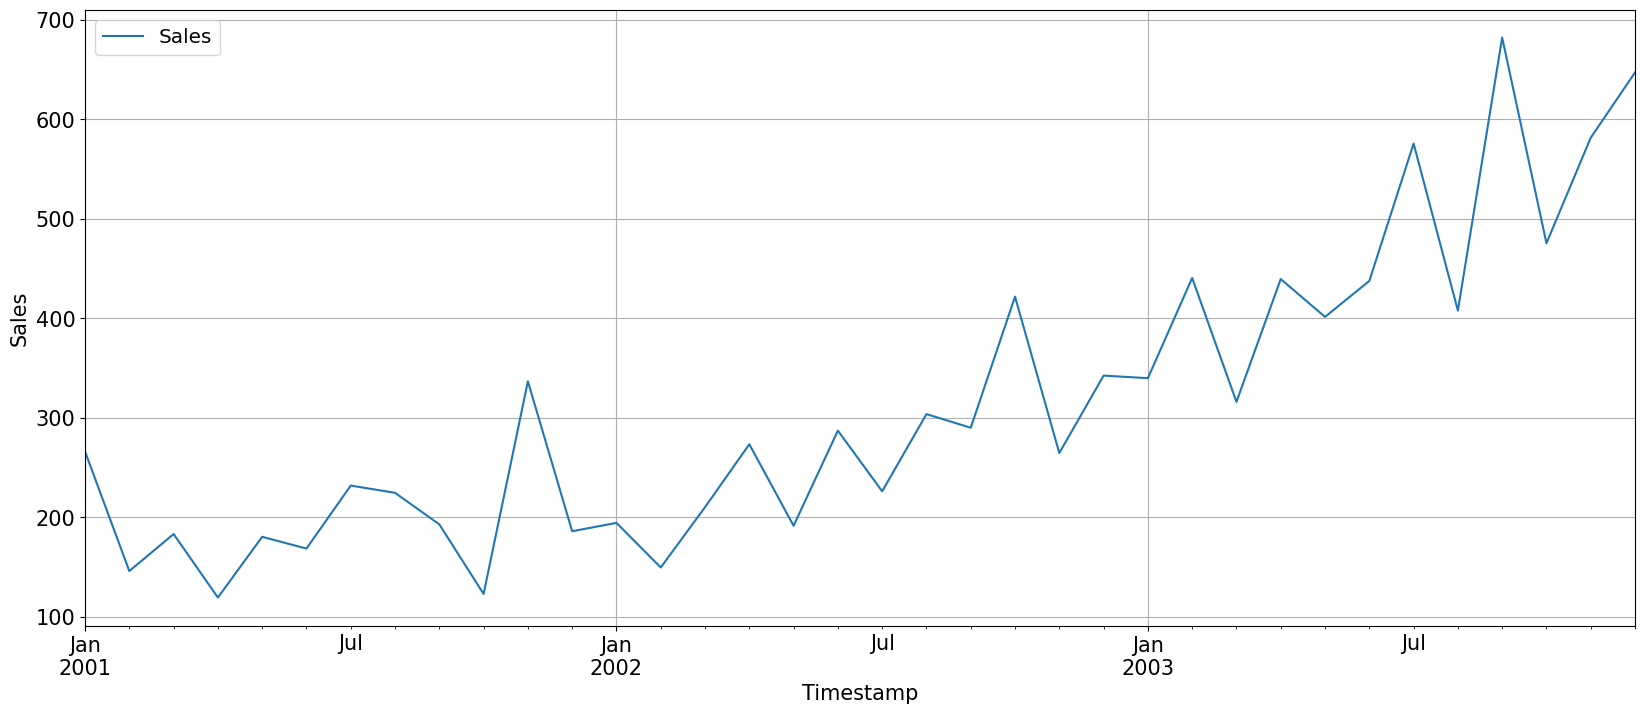

In [152]:
df_final.plot(figsize=(20,8))
plt.grid();
plt.xlabel('Timestamp',fontsize=15)
plt.ylabel('Sales',fontsize=15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.legend(fontsize="x-large")

There seems to be a trend (increasing) with a seasonality as well.

In [154]:
round(df_final.describe(),3)

,Sales
count,36.000
mean,312.600
std,148.937
min,119.300
25%,192.450
50%,280.150
75%,411.100
max,682.000


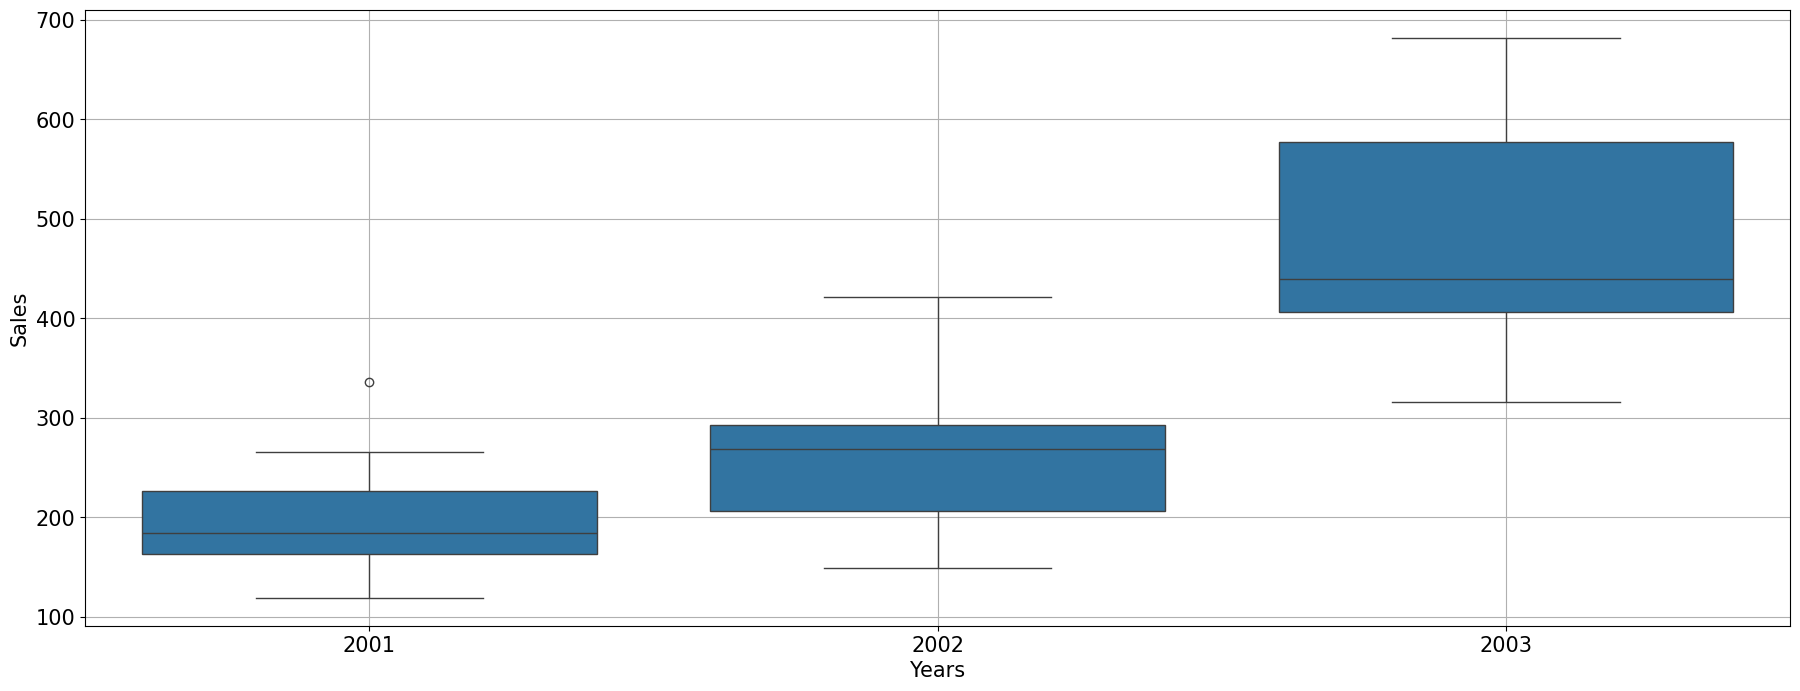

In [155]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df_final.index.year,y = df_final.values[:,0],ax=ax)
plt.grid();
plt.xlabel('Years',fontsize=15)
plt.ylabel('Sales',fontsize=15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)

Above plot suggests that series has a significant trend. Every year sales is increasing.

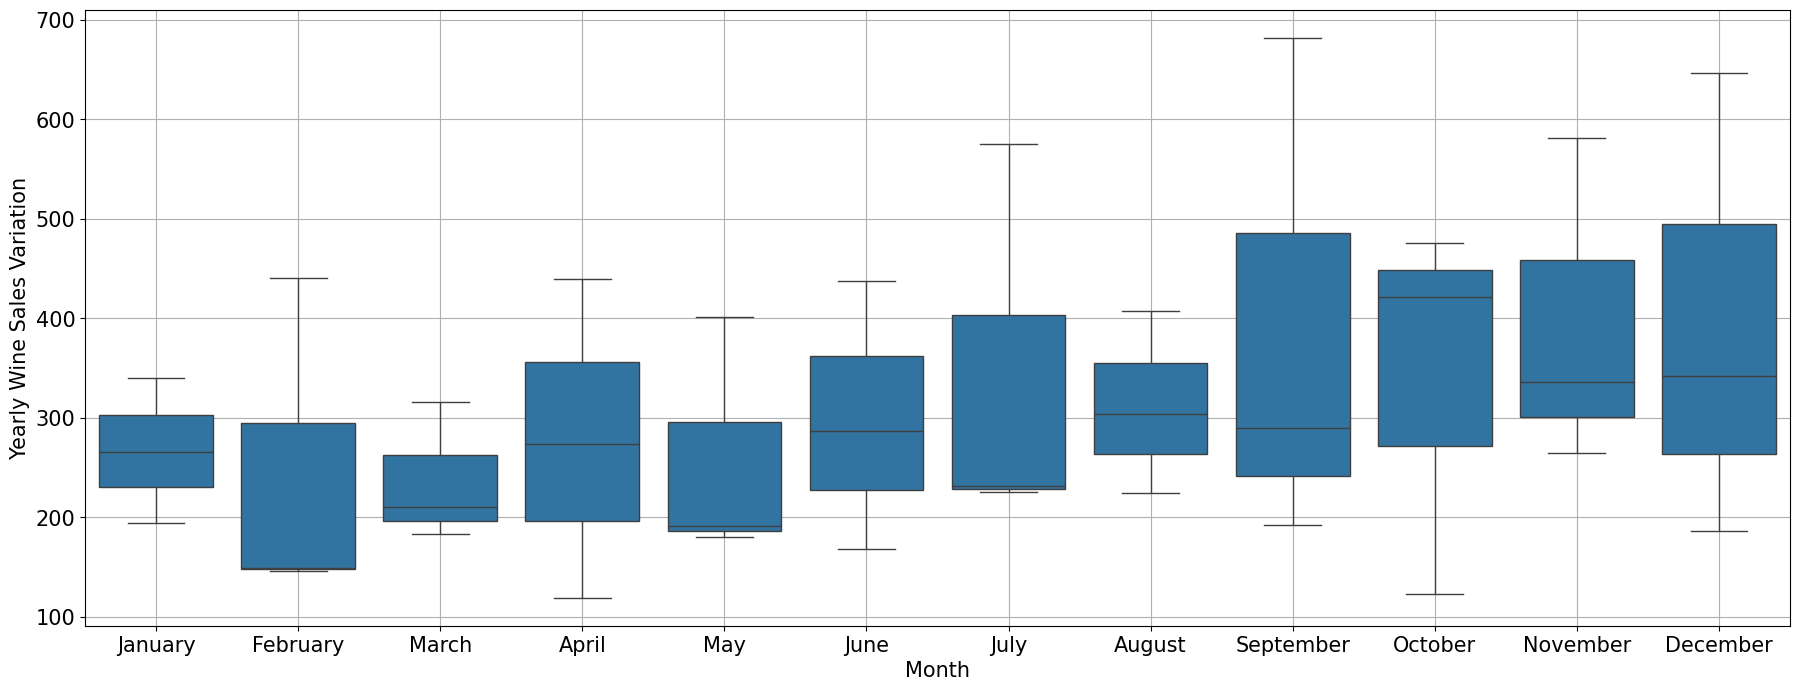

In [157]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df_final.index.month_name(),y = df_final.values[:,0],ax=ax)

plt.grid();
plt.xlabel('Month',fontsize=15)
plt.ylabel('Yearly Wine Sales Variation',fontsize=15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)

It appears that we have a seasonal component each year.

Also, we see that there are no outliers present.

In [159]:
monthly_sales_across_years = pd.pivot_table(df_final, values = 'Sales', columns = df_final.index.month_name(), index = df_final.index.year)
monthly_sales_across_years

Time_Stamp,April,August,December,February,January,July,June,March,May,November,October,September
Time_Stamp,,,,,,,,,,,,
2001,119.3,224.5,185.9,145.9,266.0,231.8,168.5,183.1,180.3,336.5,122.9,192.8
2002,273.3,303.6,342.3,149.5,194.3,226.0,287.0,210.1,191.4,264.5,421.6,289.9
2003,439.3,407.6,646.9,440.4,339.7,575.5,437.4,315.9,401.3,581.3,475.3,682.0


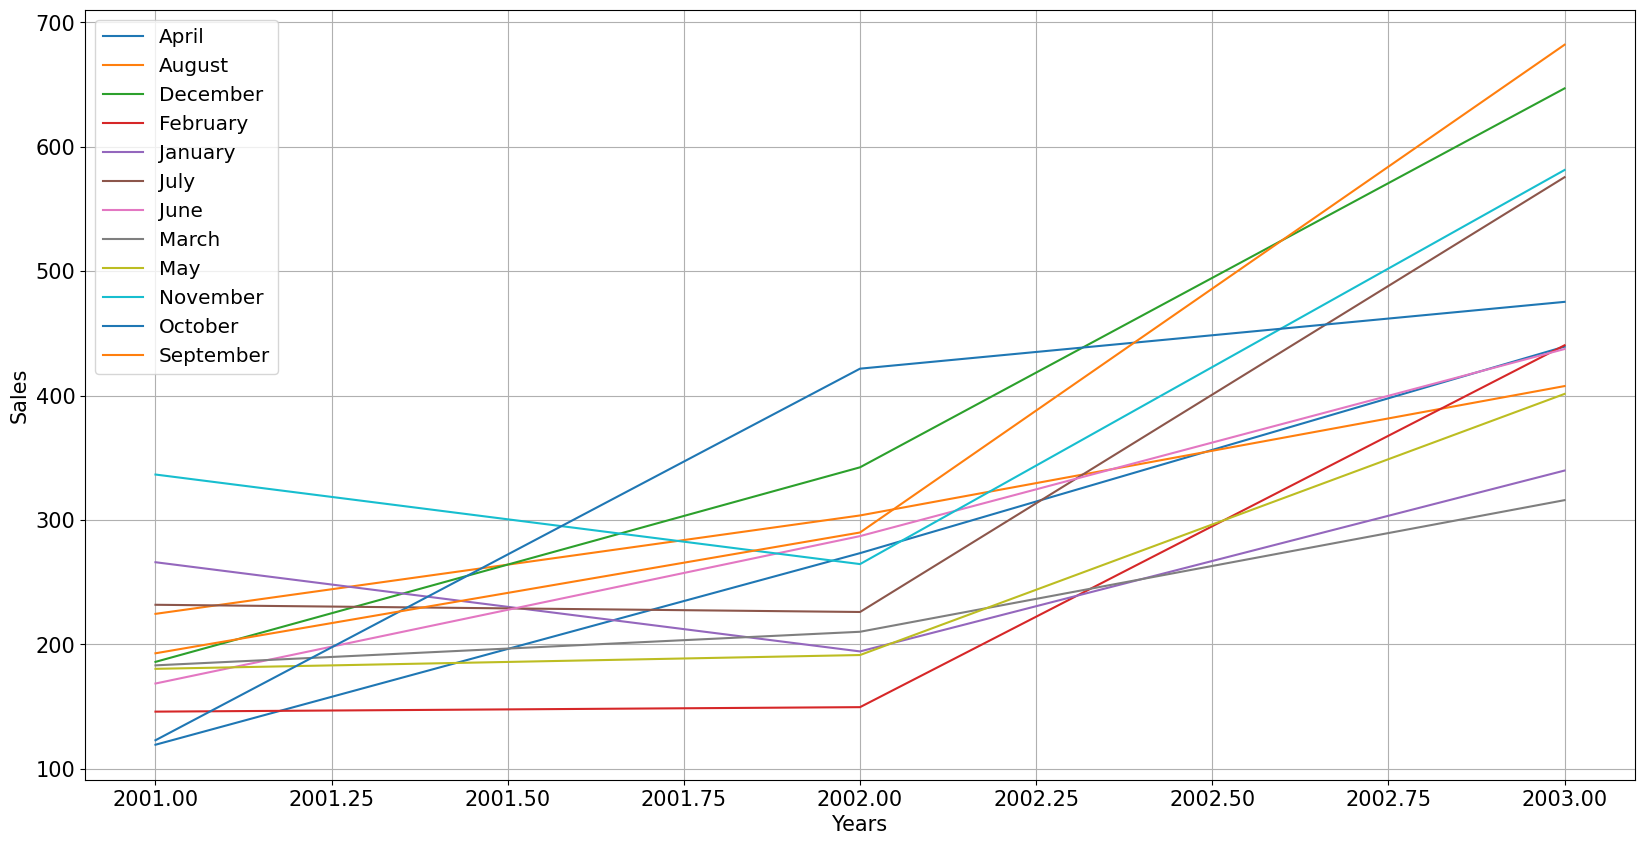

In [160]:
monthly_sales_across_years.plot(figsize=(20,10))
plt.grid()
plt.legend(loc='best');
plt.xlabel('Years',fontsize=15)
plt.ylabel('Sales',fontsize=15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.legend(fontsize="x-large")

Till 2002 there is no significant trend, but from 2002 to 2003 there is a significant trend seen.

In [162]:
quarterly_turnover = pd.pivot_table(df_final, values = "Sales", columns = df_final.index.quarter, index = df_final.index.year)
quarterly_turnover

Time_Stamp,1,2,3,4
Time_Stamp,,,,
2001,198.333333,156.033333,216.366667,215.100000
2002,184.633333,250.566667,273.166667,342.800000
2003,365.333333,426.000000,555.033333,567.833333


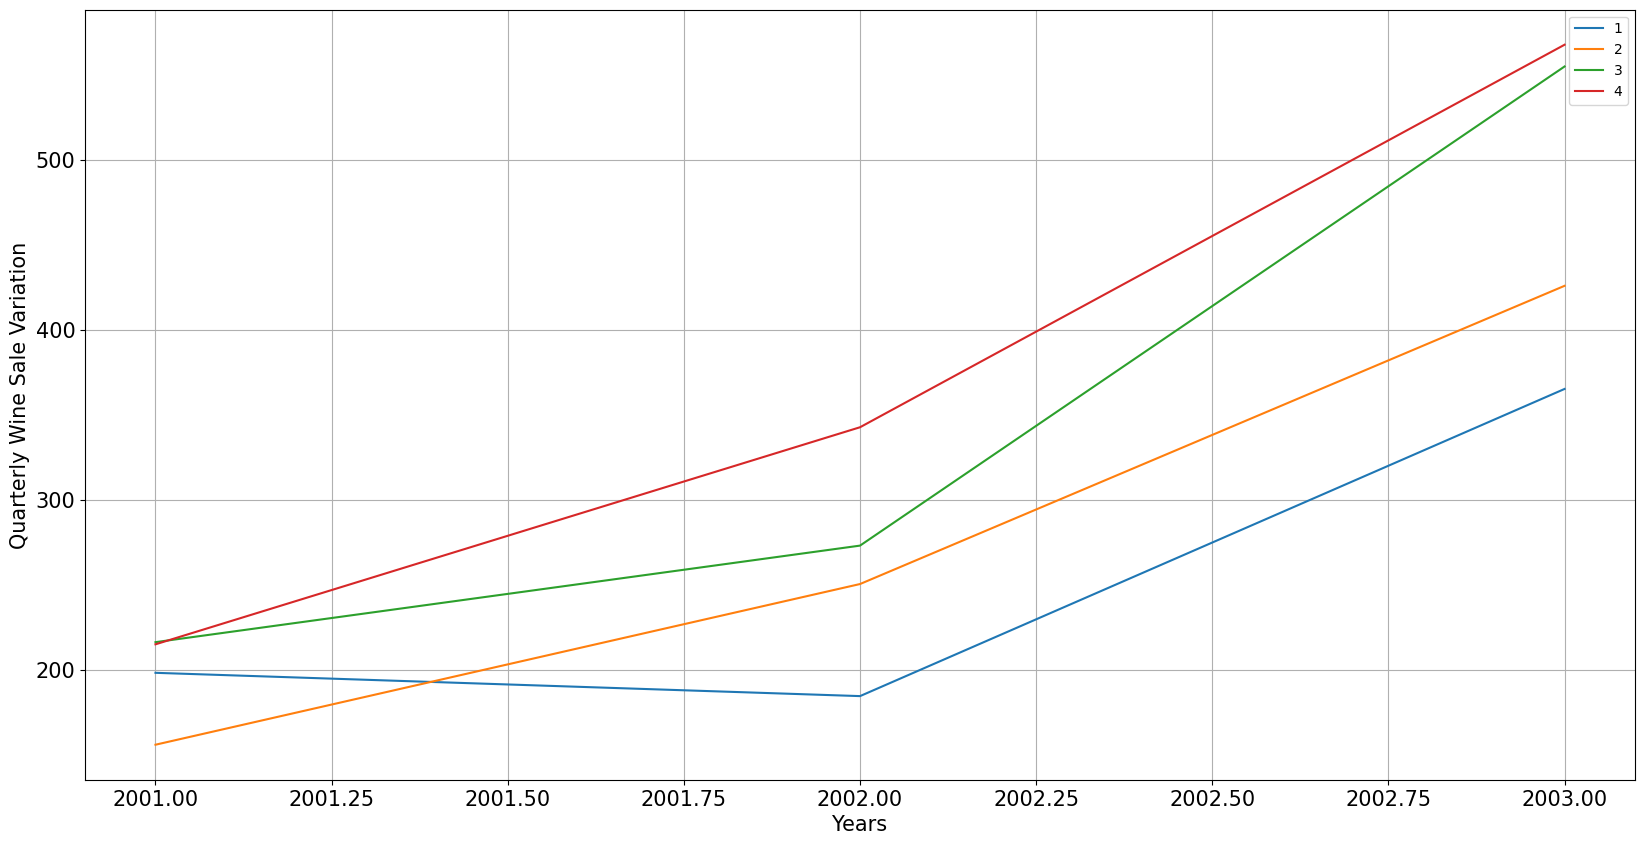

In [163]:
quarterly_turnover.plot(figsize=(20,10))
plt.grid()
plt.legend(loc='best');

plt.xlabel('Years',fontsize=15)
plt.ylabel('Quarterly Wine Sale Variation',fontsize=15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)

As seen from the above plot, Q4 has the highest sales. After that Q3. Q1 and Q2 have lowest sales.

Satışların farklı yıllara ve yıllara göre farklı aylara yayılımını anlamak için zaman serisi ay grafiğini çizmek.
- Yıl İçinde Satışların Değişimi: Grafikte, yılın her ayındaki satışlar siyah çizgilerle gösterilmiş. Her bir ay için çizgilerin başlangıcı ve sonu, o ay içerisindeki minimum ve maksimum satışları gösterir.

- Kırmızı Çizgiler: Her bir ayın ortalama satışları kırmızı çizgiyle belirtilmiş. Bu çizgiler, aylık satışların merkezine denk gelir ve her ay için satışların genel eğilimini gösterir.

- Mevsimsel Dalgalanmalar: Satışlar genellikle yaz aylarında artış gösterirken, kış aylarında düşüş eğiliminde olabilir. Örneğin, Temmuz ve Aralık aylarında satışlar diğer aylara göre daha yüksek gözüküyor.

- Satış Dalgalanmaları: Grafikteki siyah çizgiler, ay içerisindeki satışların ne kadar değişken olduğunu gösterir. Çizgiler uzunsa, o ay satışlarda büyük dalgalanmalar olmuş demektir.

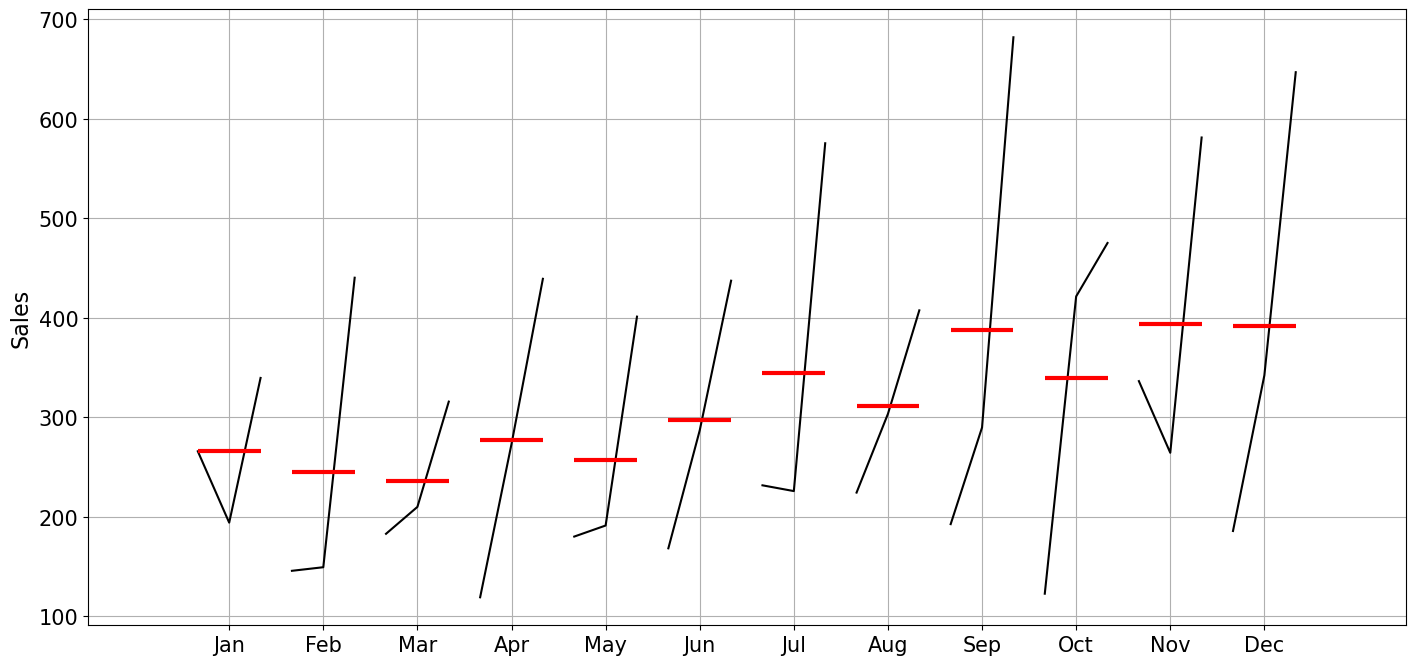

In [166]:
from pylab import rcParams

rcParams['figure.figsize'] =17,8

from statsmodels.graphics.tsaplots import month_plot
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
month_plot(df_final['Sales'],ylabel='Sales')
plt.grid();

Ampirik Kümülatif Dağılımın Çizilmesi.

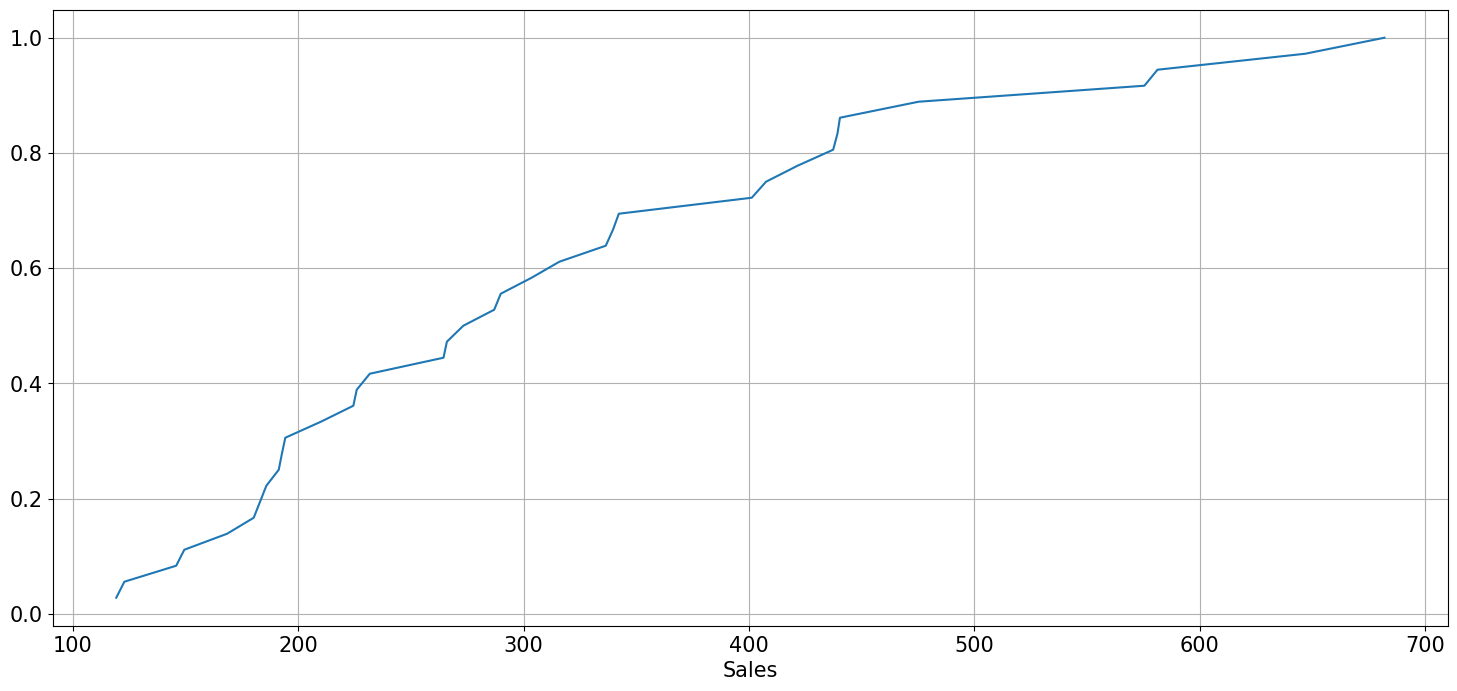

In [168]:
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df_final['Sales'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.xlabel('Sales', fontsize = 15);

Tüm ayların yaklaşık %60'ında 300 birim veya daha az satış gerçekleşti.

Tüm ayların yaklaşık %50'sinde 450 birim veya daha az satış gerçekleşti.

Aylık ortalama satışları ve aydan aya satışların yüzdelik değişimini çizin.

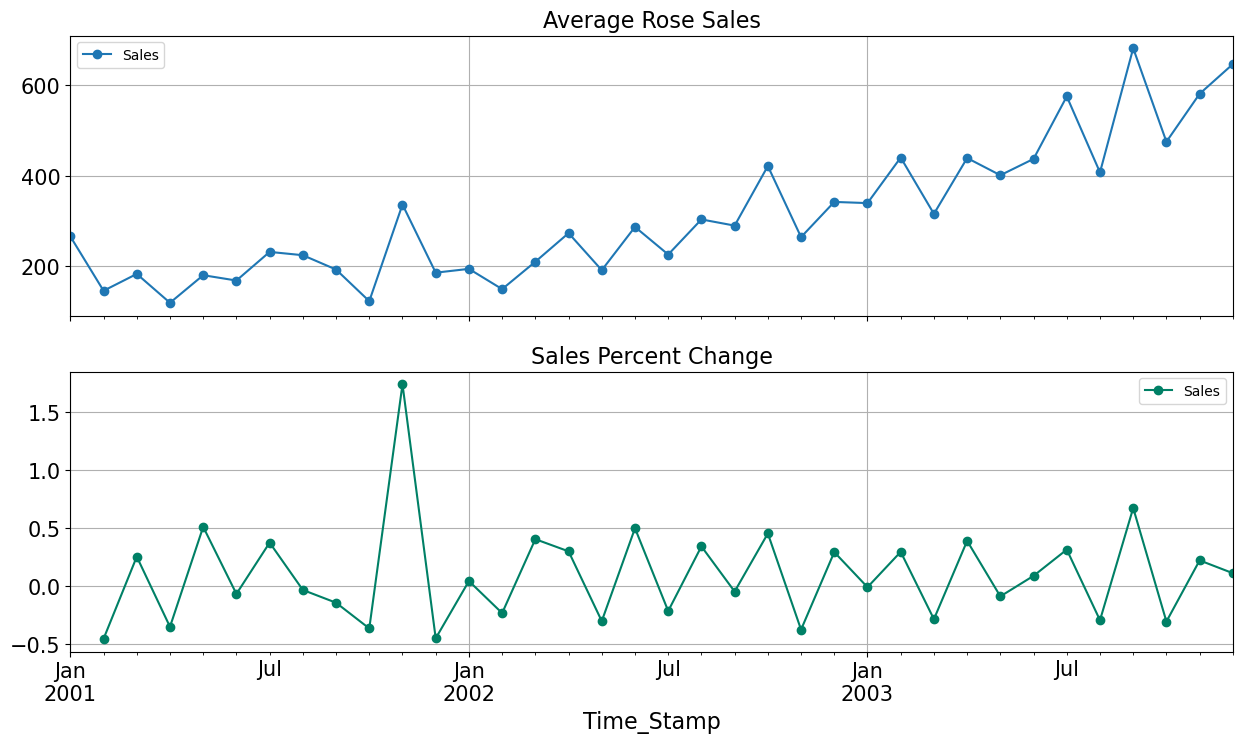

In [171]:
# group by date and get average Customers, and precent change
average    = df_final.groupby(df_final.index)["Sales"].mean()
pct_change = df_final.groupby(df_final.index)["Sales"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average Customers over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Rose Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for Customers over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Sales Percent Change",grid=True)

Her ayın sonunda satışlarda çok büyük oranda yüzdesel değişim oluyor.

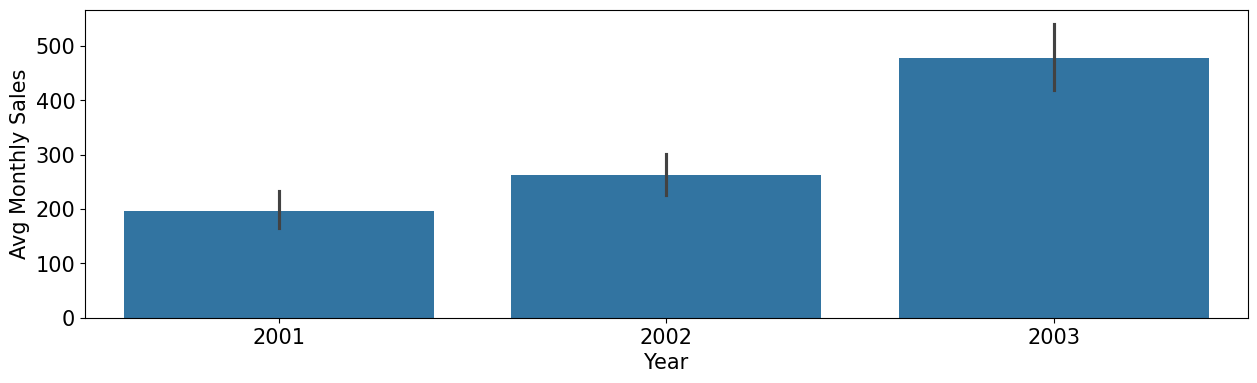

In [173]:
## Plot sales for every year
fig, (axis1) = plt.subplots(1,figsize=(15,4))

sns.barplot(x=df_final.index.year, y=df_final.values[:,0], data=df_final, ax=axis1);
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.xlabel('Year', fontsize = 15);
plt.ylabel('Avg Monthly Sales', fontsize = 15);

It can be seen that, the average monthly sales increases as we move from 2001 to 2003.

In [175]:
monthly_sales_across_years = pd.pivot_table(df_final, values = 'Sales', columns = df_final.index.month_name(), index = df_final.index.year)
yearly_total_sales = monthly_sales_across_years.sum(axis = 1, skipna = True) 
yearly_total_sales

Time_Stamp
2001    2357.5
2002    3153.5
2003    5742.6
dtype: float64

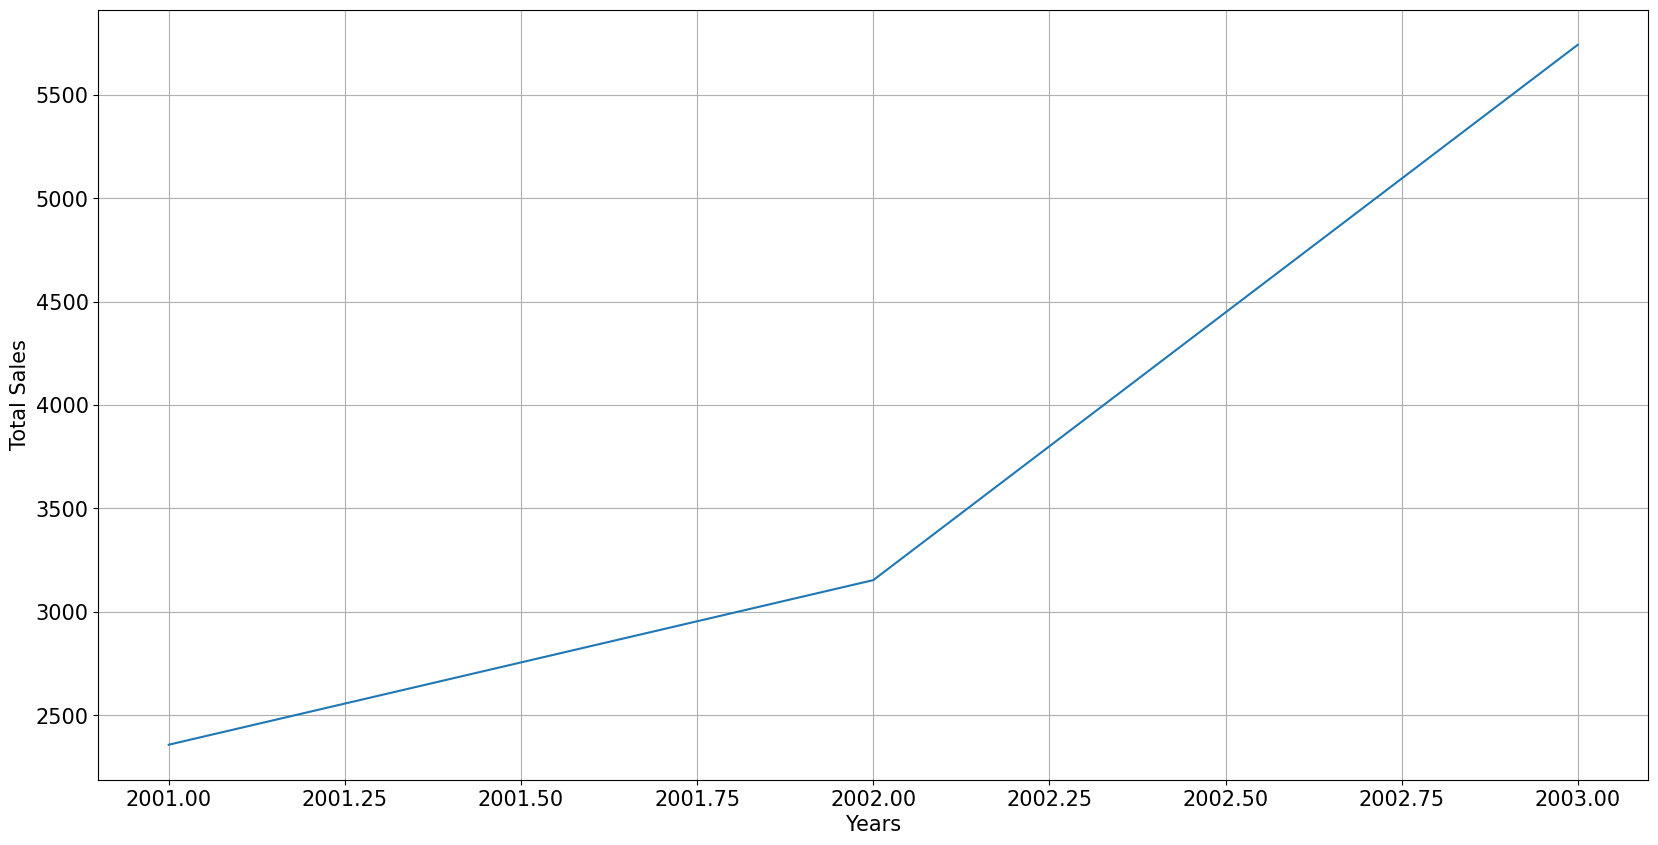

In [176]:
yearly_total_sales.plot(figsize=(20,10))
plt.grid()

plt.xlabel('Years',fontsize=15)
plt.ylabel('Total Sales',fontsize=15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)

As it can be seen that total sales every year sales is increasing.

### Decomposing the Time Series and plotting the different components.
Katkısal ayrışmayı varsayarak

In [179]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

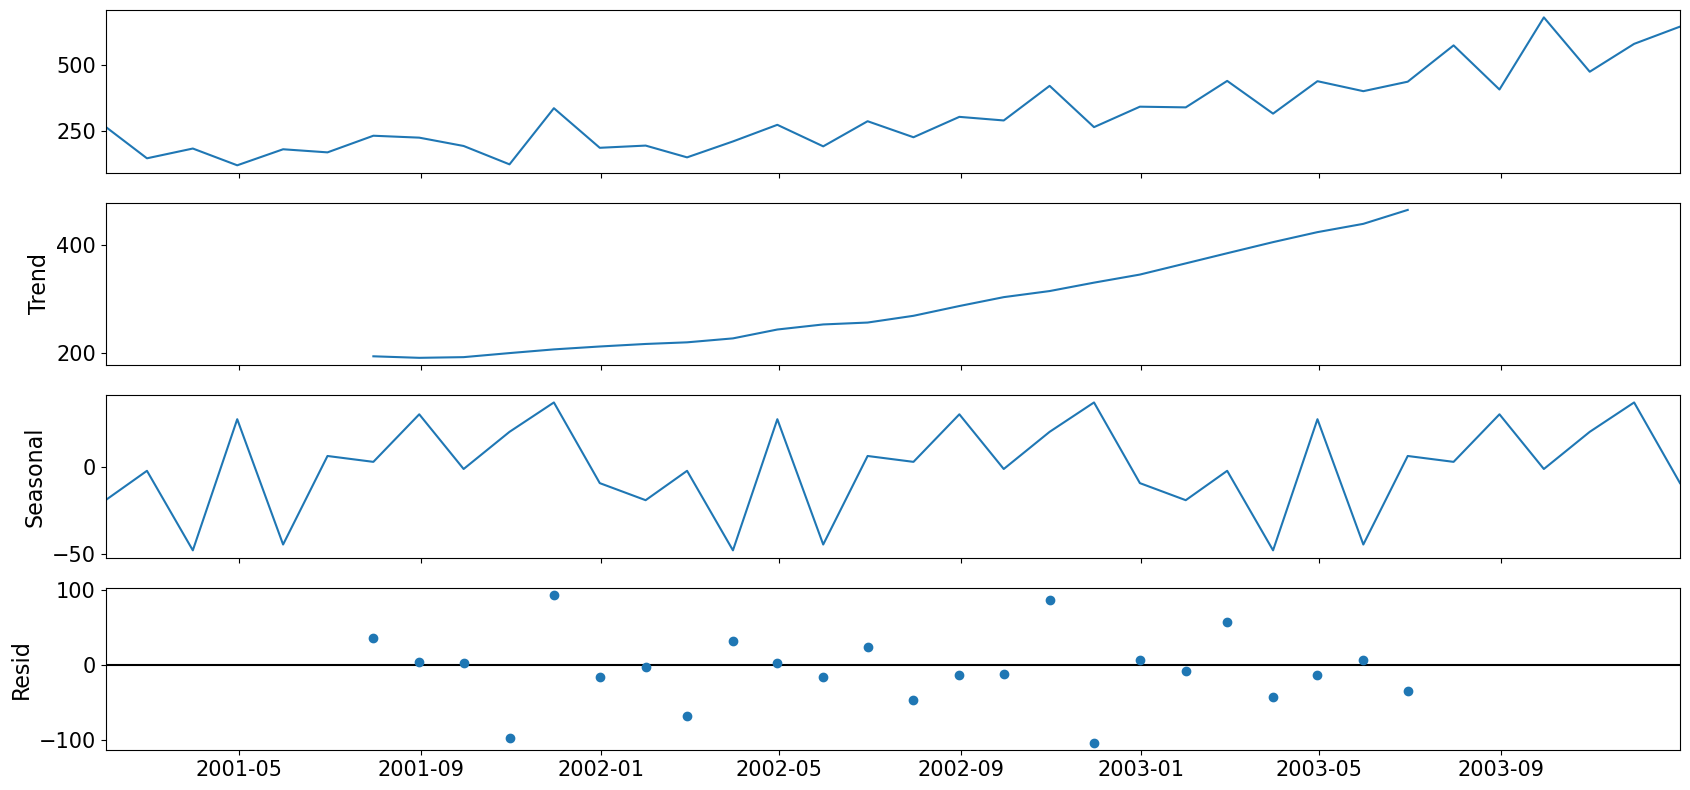

In [180]:
decomposition = seasonal_decompose(df_final,model='additive')
decomposition.plot();
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16

Çarpımsal ayrıştırmayı varsayarak

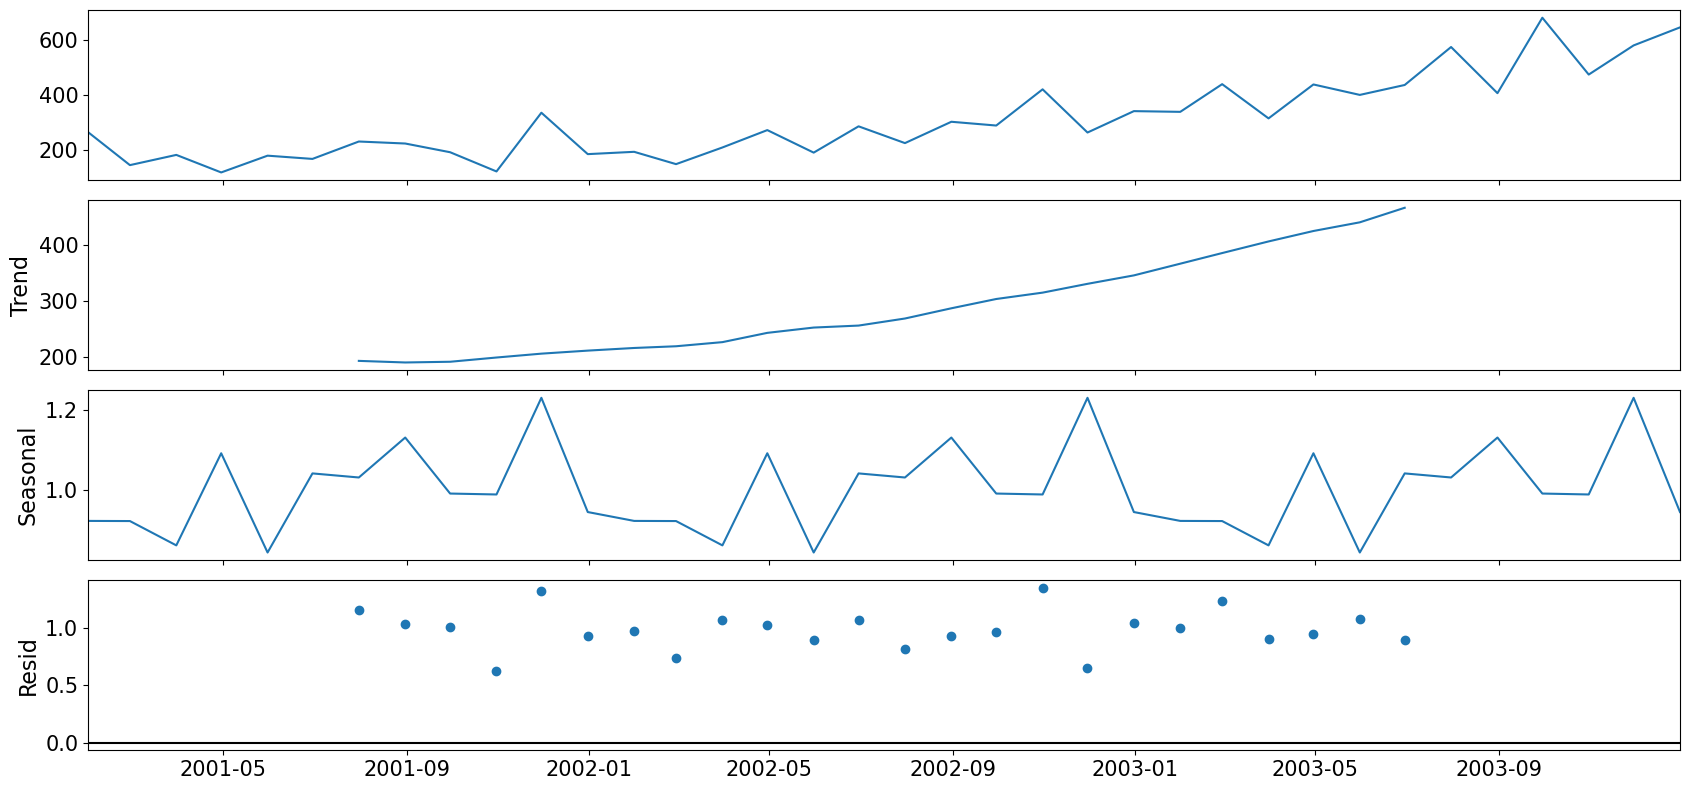

In [182]:
decomposition = seasonal_decompose(df_final,model='multiplicative')
decomposition.plot();
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16

Çarpımsal modelde, trend ve mevsimselliğin açıkça ayrıldığını ve gürültü ölçeğinin küçük olduğunu gözlemliyoruz. Katkısal modelde, kalıntıda aykırı değerler mevcuttur. Bu nedenle seri çarpımsaldır.

In [184]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
2001-01-31           NaN
2001-02-28           NaN
2001-03-31           NaN
2001-04-30           NaN
2001-05-31           NaN
2001-06-30           NaN
2001-07-31    193.470833
2001-08-31    190.633333
2001-09-30    191.908333
2001-10-31    199.450000
2001-11-30    206.329167
2001-12-31    211.729167
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
2001-01-31    0.922913
2001-02-28    0.922549
2001-03-31    0.861982
2001-04-30    1.091374
2001-05-31    0.844236
2001-06-30    1.041187
2001-07-31    1.031036
2001-08-31    1.130490
2001-09-30    0.991044
2001-10-31    0.988744
2001-11-30    1.229457
2001-12-31    0.944987
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
2001-01-31         NaN
2001-02-28         NaN
2001-03-31         NaN
2001-04-30         NaN
2001-05-31         NaN
2001-06-30         NaN
2001-07-31    1.162048
2001-08-31    1.041720
2001-09-30    1.013725
2001-10-31    0.623209
2001-11-30    1.326511
2001-12-31    0.929123
Name: resid, dtype:

Splitting the data into training and test. 70:30

In [186]:
train    =   df_final[0:int(len(df)*0.7)] 
test     =   df_final[int(len(df)*0.7):]

In [187]:
train.shape

(25, 1)

In [188]:
train.tail()

,Sales
Time_Stamp,
2002-09-30,289.9
2002-10-31,421.6
2002-11-30,264.5
2002-12-31,342.3
2003-01-31,339.7


In [189]:
test.shape

(11, 1)

In [190]:
test.head()

,Sales
Time_Stamp,
2003-02-28,440.4
2003-03-31,315.9
2003-04-30,439.3
2003-05-31,401.3
2003-06-30,437.4


### Eğitim verileri üzerinde çeşitli üstel düzeltme modelleri kurmak ve test verileri üzerinde RMSE kullanarak modeli değerlendirmek.
Model 1: Linear Regression
Bu belirli doğrusal regresyon için, 'Satışlar' değişkenini oluşum sırasına göre regresyona sokacağız. Bunun için, doğrusal regresyona yerleştirmeden önce eğitim verilerimizi değiştirmemiz gerekir.

In [192]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+26 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
Test Time instance 
 [26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]


In [193]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [194]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sales  time
Time_Stamp             
2001-01-31  266.0     1
2001-02-28  145.9     2
2001-03-31  183.1     3
2001-04-30  119.3     4
2001-05-31  180.3     5 

Last few rows of Training Data 
             Sales  time
Time_Stamp             
2002-09-30  289.9    21
2002-10-31  421.6    22
2002-11-30  264.5    23
2002-12-31  342.3    24
2003-01-31  339.7    25 

First few rows of Test Data 
             Sales  time
Time_Stamp             
2003-02-28  440.4    26
2003-03-31  315.9    27
2003-04-30  439.3    28
2003-05-31  401.3    29
2003-06-30  437.4    30 

Last few rows of Test Data 
             Sales  time
Time_Stamp             
2003-08-31  407.6    32
2003-09-30  682.0    33
2003-10-31  475.3    34
2003-11-30  581.3    35
2003-12-31  646.9    36 



Artık eğitim ve test verilerimiz değiştirildiğine göre, eğitim verileri üzerinde modeli oluşturmak ve test verileri üzerinde modeli test etmek için
lineer regresyonu'i kullanalım.

In [196]:
from sklearn.linear_model import LinearRegression

In [197]:
lr = LinearRegression()

In [198]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sales'].values)

LinearRegression()

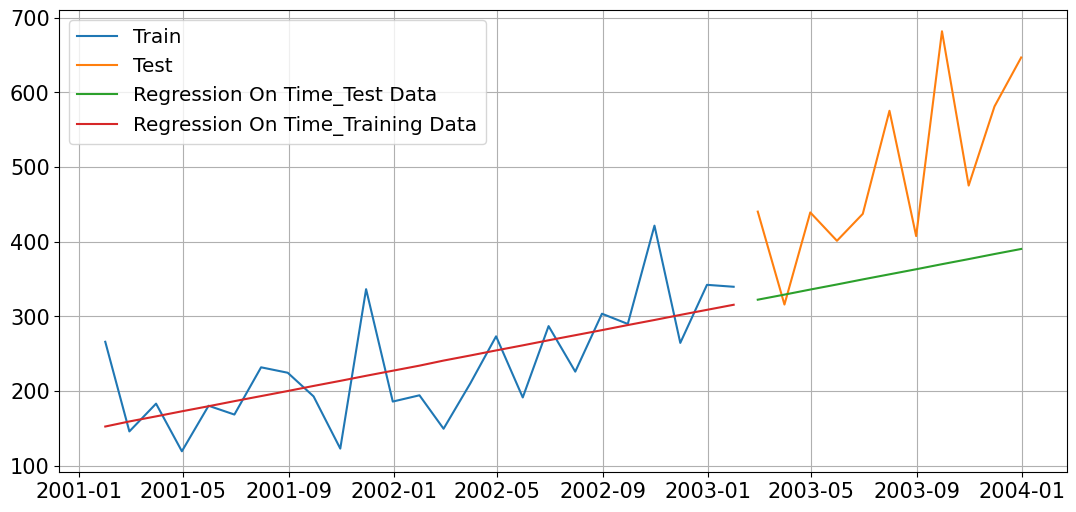

In [199]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.plot(LinearRegression_train['RegOnTime'], label='Regression On Time_Training Data')
plt.legend(loc='best')
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.legend(fontsize="x-large")
plt.grid();

Doğruluk ölçümlerinin hesaplanmasına yönelik fonksiyonların tanımlanması.

In [201]:
from sklearn import metrics

In [202]:
## Mean Absolute Percentage Error - Function Definition

def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

In [203]:
## Training Data - RMSE and MAPE

rmse_model1_train = metrics.root_mean_squared_error(train['Sales'],train_predictions_model1)
mape_model1_train = MAPE(train['Sales'],train_predictions_model1)
print("For RegressionOnTime forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model1_train, mape_model1_train))

For RegressionOnTime forecast on the Training Data,  RMSE is 56.962 MAPE is 19.00


In [204]:
rmse_model1_test = metrics.root_mean_squared_error(test['Sales'],test_predictions_model1)
mape_model1_test = MAPE(test['Sales'],test_predictions_model1)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model1_test, mape_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 164.563 MAPE is 27.94


In [205]:
resultsDf = pd.DataFrame({'Model': 'RegressionOnTime',
                                                    'Test RMSE': [rmse_model1_test],
                          'Test MAPE': [mape_model1_test]},
                         index=['Model 1'])
resultsDf

,Model,Test RMSE,Test MAPE
Model 1,RegressionOnTime,164.563291,27.94


**Simple Average**
For this particular simple average method, we will forecast by using the average of the training values.¶

In [207]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [208]:
## Let us get the average of  the training set.

SimpleAverage_train['mean_forecast'] = train['Sales'].mean()
SimpleAverage_train.head()

,Sales,mean_forecast
Time_Stamp,,
2001-01-31,266.0,234.028
2001-02-28,145.9,234.028
2001-03-31,183.1,234.028
2001-04-30,119.3,234.028
2001-05-31,180.3,234.028


In [209]:
SimpleAverage_test['mean_forecast'] = train['Sales'].mean()
SimpleAverage_test.head()

,Sales,mean_forecast
Time_Stamp,,
2003-02-28,440.4,234.028
2003-03-31,315.9,234.028
2003-04-30,439.3,234.028
2003-05-31,401.3,234.028
2003-06-30,437.4,234.028


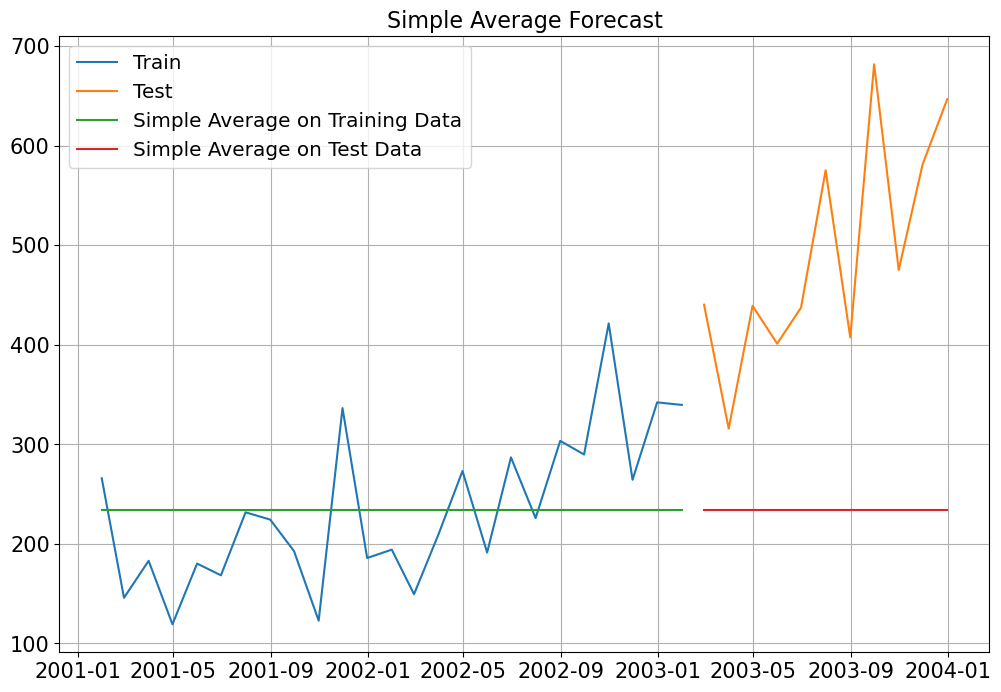

In [210]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Sales'], label='Train')
plt.plot(SimpleAverage_test['Sales'], label='Test')
plt.plot(SimpleAverage_train['mean_forecast'], label='Simple Average on Training Data')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.legend(fontsize="x-large")
plt.grid();

In [211]:
## Training Data - RMSE and MAPE

rmse_model3_train = metrics.root_mean_squared_error(train['Sales'],SimpleAverage_train['mean_forecast'])
mape_model3_train = MAPE(train['Sales'],SimpleAverage_train['mean_forecast'])
print("For Simple Average Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model3_train, mape_model3_train))

For Simple Average Model forecast on the Training Data,  RMSE is 75.147 MAPE is 26.80


In [212]:
## Test Data - RMSE and MAPE

rmse_model3_test = metrics.root_mean_squared_error(test['Sales'],SimpleAverage_test['mean_forecast'])
mape_model3_test = MAPE(test['Sales'],SimpleAverage_test['mean_forecast'])
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model3_test, mape_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 279.196 MAPE is 52.35


In [213]:
resultsDf_3 = pd.DataFrame({'Model': 'SimpleAverage', 
                            
                            'Test RMSE': [rmse_model3_test],
                            'Test MAPE': [mape_model3_test]}
                           ,index=['Model 2'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Model,Test RMSE,Test MAPE
Model 1,RegressionOnTime,164.563291,27.94
Model 2,SimpleAverage,279.195549,52.35


Model 4: Moving Average(MA)

Hareketli ortalama modeli için, farklı aralıklar için yuvarlanan ortalamaları (veya hareketli ortalamaları) hesaplayacağız. En iyi aralık, buradaki maksimum doğruluk (veya minimum hata) ile belirlenebilir.

Hareketli Ortalama için, tüm veriler üzerinden ortalama alacağız.

In [215]:
MovingAverage = df_final.copy()
MovingAverage.head()

,Sales
Time_Stamp,
2001-01-31,266.0
2001-02-28,145.9
2001-03-31,183.1
2001-04-30,119.3
2001-05-31,180.3


In [216]:
MovingAverage['Trailing_2'] = MovingAverage['Sales'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sales'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sales'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sales'].rolling(9).mean()

MovingAverage.head()

,Sales,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Time_Stamp,,,,,
2001-01-31,266.0,NaN,NaN,NaN,NaN
2001-02-28,145.9,205.95,NaN,NaN,NaN
2001-03-31,183.1,164.50,NaN,NaN,NaN
2001-04-30,119.3,151.20,178.575,NaN,NaN
2001-05-31,180.3,149.80,157.150,NaN,NaN


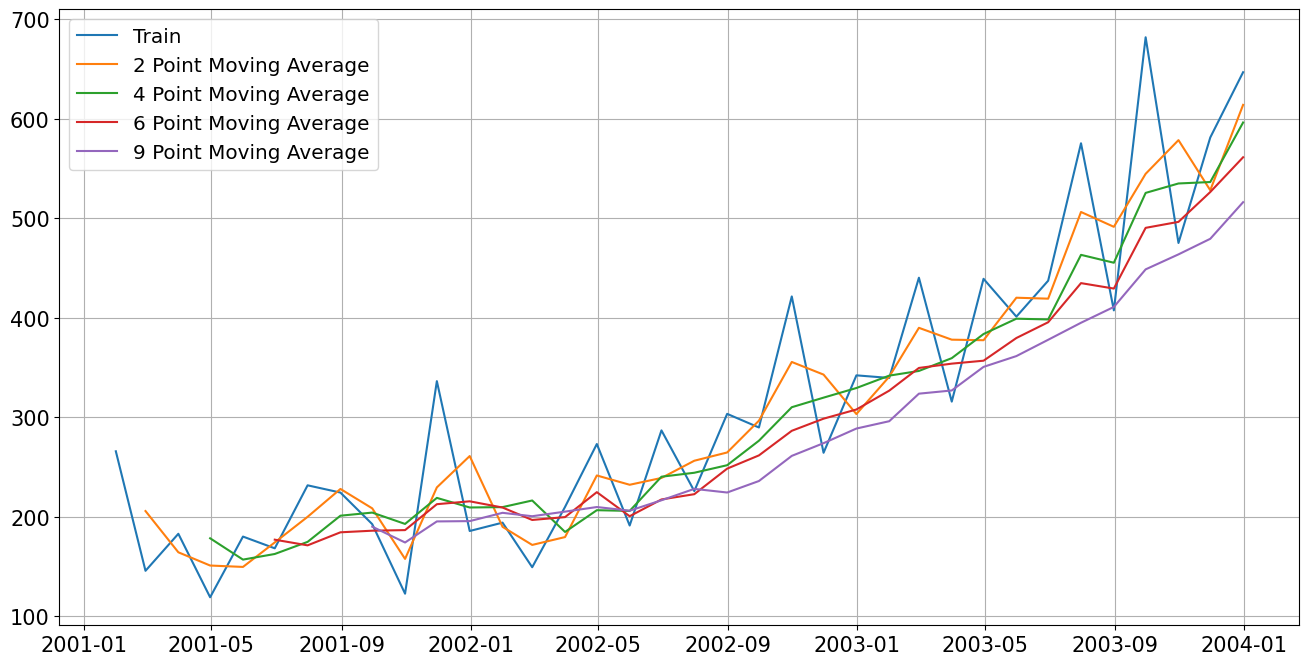

In [217]:
plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sales'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.legend(loc = 'best')
plt.legend(fontsize="x-large")
plt.grid();

In [218]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[0:int(len(df)*0.7)] 
trailing_MovingAverage_test=MovingAverage[int(len(df)*0.7):]

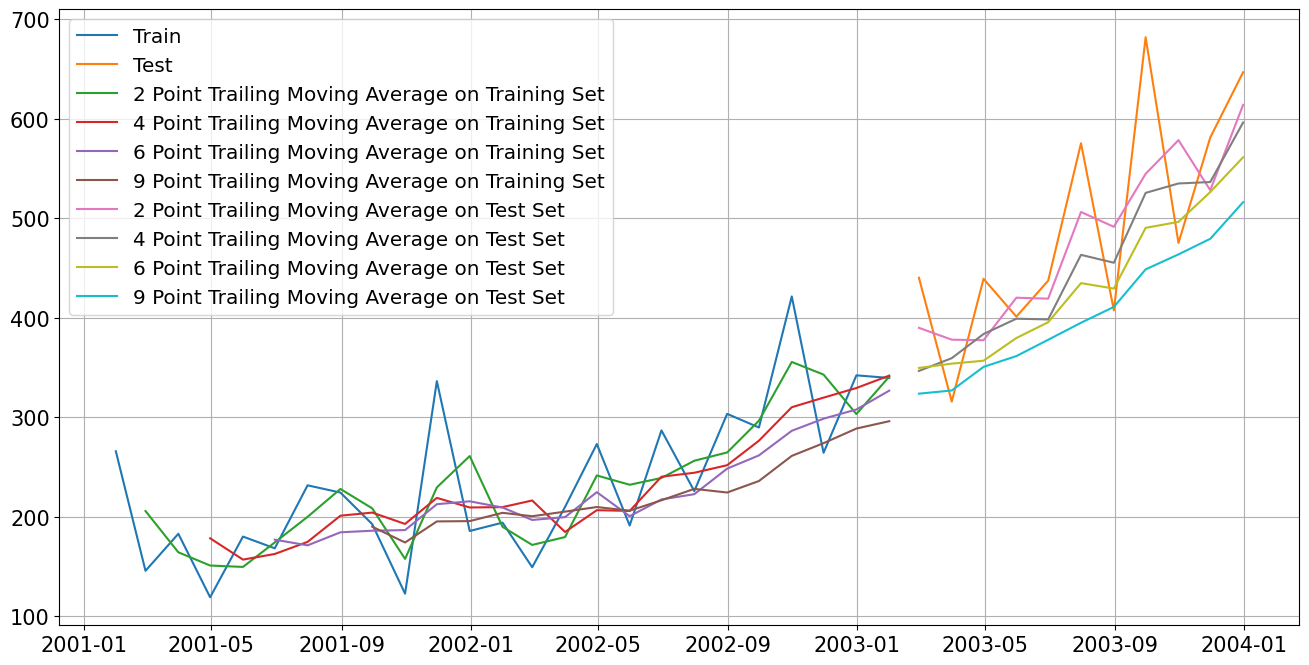

In [219]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sales'], label='Train')
plt.plot(trailing_MovingAverage_test['Sales'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.legend(loc = 'best')
plt.legend(fontsize="x-large")
plt.grid();

In [220]:
## Test Data - RMSE and MAPE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.root_mean_squared_error(test['Sales'],trailing_MovingAverage_test['Trailing_2'])
mape_model4_test_2 = MAPE(test['Sales'],trailing_MovingAverage_test['Trailing_2'])
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_2, mape_model4_test_2))

## Test Data - RMSE and MAPE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.root_mean_squared_error(test['Sales'],trailing_MovingAverage_test['Trailing_4'])
mape_model4_test_4 = MAPE(test['Sales'],trailing_MovingAverage_test['Trailing_4'])
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_4, mape_model4_test_4))

## Test Data - RMSE and MAPE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.root_mean_squared_error(test['Sales'],trailing_MovingAverage_test['Trailing_6'])
mape_model4_test_6 = MAPE(test['Sales'],trailing_MovingAverage_test['Trailing_6'])
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_6, mape_model4_test_6))

## Test Data - RMSE and MAPE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.root_mean_squared_error(test['Sales'],trailing_MovingAverage_test['Trailing_9'])
mape_model4_test_9 = MAPE(test['Sales'],trailing_MovingAverage_test['Trailing_9'])
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_9, mape_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 71.420 MAPE is 12.78
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 75.514 MAPE is 13.05
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 88.576 MAPE is 14.62
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 113.260 MAPE is 18.07


In [221]:
resultsDf_4 = pd.DataFrame({'Model': ['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'],    
                            'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]
                            ,'Test MAPE': [mape_model4_test_2,mape_model4_test_4,mape_model4_test_6
                                           ,mape_model4_test_9]}
                           ,index=['Model 3.1','Model 3.2'
                                   ,'Model 3.3','Model 3.4'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Model,Test RMSE,Test MAPE
Model 1,RegressionOnTime,164.563291,27.94
Model 2,SimpleAverage,279.195549,52.35
Model 3.1,2pointTrailingMovingAverage,71.420194,12.78
Model 3.2,4pointTrailingMovingAverage,75.513759,13.05
Model 3.3,6pointTrailingMovingAverage,88.575544,14.62
Model 3.4,9pointTrailingMovingAverage,113.259927,18.07


Model 5: Basit Üstel Düzeltme

In [223]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [224]:
SES_train = train.copy()
SES_test = test.copy()

In [225]:
model_SES = SimpleExpSmoothing(SES_train['Sales'])

C:\Users\dilan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


In [226]:
model_SES_autofit = model_SES.fit(optimized=True,use_brute=True)

In [227]:
model_SES_autofit.params

{'smoothing_level': 0.35808871495229666,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 266.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [228]:
SES_train['predict'] = model_SES_autofit.fittedvalues
SES_train.head()

,Sales,predict
Time_Stamp,,
2001-01-31,266.0,266.000000
2001-02-28,145.9,266.000000
2001-03-31,183.1,222.993545
2001-04-30,119.3,208.708117
2001-05-31,180.3,176.692079


In [229]:
SES_test['predict'] = model_SES_autofit.forecast(len(SES_test))
SES_test.head()

,Sales,predict
Time_Stamp,,
2003-02-28,440.4,325.139144
2003-03-31,315.9,325.139144
2003-04-30,439.3,325.139144
2003-05-31,401.3,325.139144
2003-06-30,437.4,325.139144


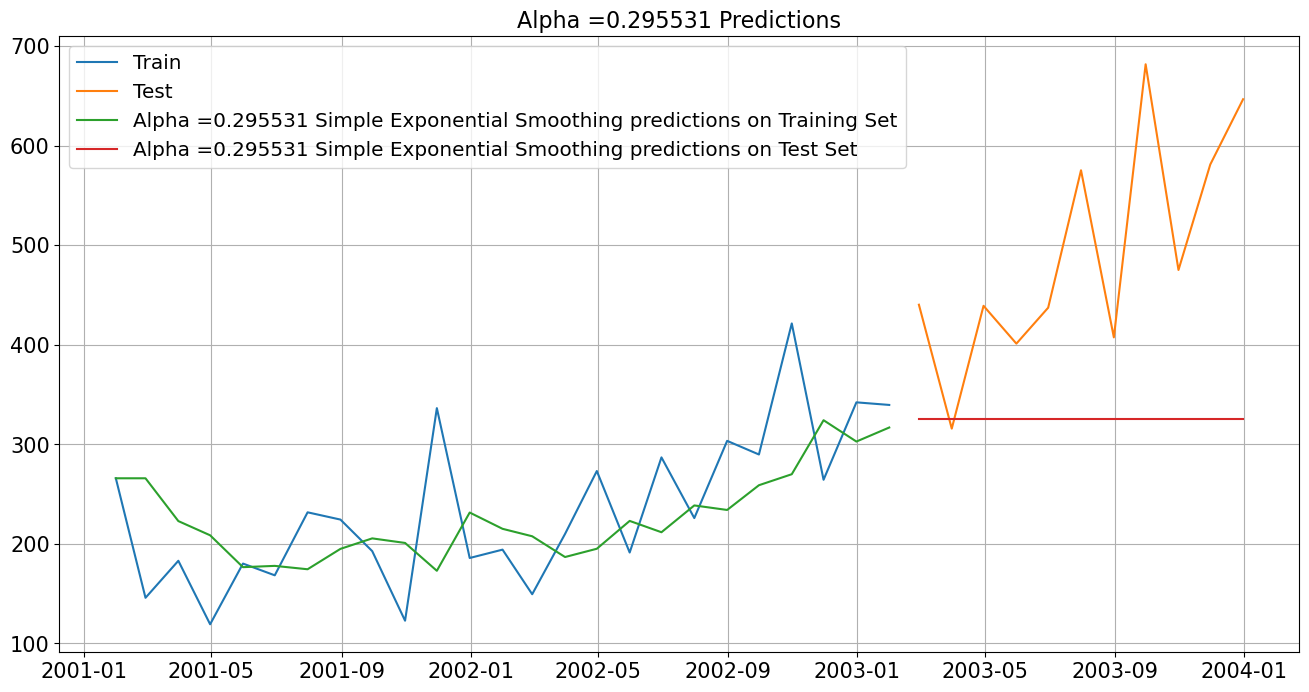

In [230]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Sales'], label='Train')
plt.plot(SES_test['Sales'], label='Test')

plt.plot(SES_train['predict'], label='Alpha =0.295531 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict'], label='Alpha =0.295531 Simple Exponential Smoothing predictions on Test Set')
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.legend(loc = 'best')
plt.legend(fontsize="x-large")
plt.grid()
plt.title('Alpha =0.295531 Predictions');

In [231]:
rmse_model5_train_1 = metrics.root_mean_squared_error(SES_train['Sales'],SES_train['predict'])
mape_model5_train_1 = MAPE(SES_train['Sales'],SES_train['predict'])
print("For Alpha =0.295531 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model5_train_1, mape_model5_train_1))

For Alpha =0.295531 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is 67.822 MAPE is 22.61


In [232]:
## Test Data RMSE and MAPE

rmse_model5_test_1 = metrics.root_mean_squared_error(SES_test['Sales'],SES_test['predict'])
mape_model5_test_1 = MAPE(SES_test['Sales'],SES_test['predict'])
print("For Alpha =0.295531 Simple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model5_test_1, mape_model5_test_1))

For Alpha =0.295531 Simple Exponential Smoothing Model forecast on the Test Data,  RMSE is 198.479 MAPE is 34.15


In [233]:
resultsDf_5_1 = pd.DataFrame({'Model': 'Alpha=0.295531,SimpleExponentialSmoothing','Test RMSE': [rmse_model5_test_1],'Test MAPE': [mape_model5_test_1]}
                           ,index=['Model 4.1'])

resultsDf = pd.concat([resultsDf, resultsDf_5_1])
resultsDf

,Model,Test RMSE,Test MAPE
Model 1,RegressionOnTime,164.563291,27.94
Model 2,SimpleAverage,279.195549,52.35
Model 3.1,2pointTrailingMovingAverage,71.420194,12.78
Model 3.2,4pointTrailingMovingAverage,75.513759,13.05
Model 3.3,6pointTrailingMovingAverage,88.575544,14.62
Model 3.4,9pointTrailingMovingAverage,113.259927,18.07
Model 4.1,"Alpha=0.295531,SimpleExponentialSmoothing",198.478952,34.15


Farklı alfa değerlerinin ayarlanması.

Unutmayın, alfa değeri ne kadar yüksek olursa, daha güncel gözlemlere daha fazla ağırlık verilir. Demek ki yakın zamanda yaşananlar yeniden yaşanacak.

Test setinde hangi değerin alfa için en iyi sonucu verdiğini anlamak için farklı alfa değerlerine sahip bir döngü çalıştıracağız.

In [235]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_5_2 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_5_2

,Alpha Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE


In [236]:
for i in np.arange(0.01, 1, 0.01):
    # Fit the model with the current alpha value
    model_SES_alpha_i = model_SES.fit(smoothing_level=i, optimized=False, use_brute=True)
    
    # Store predictions in separate columns
    SES_train[f'predict_{i}'] = model_SES_alpha_i.fittedvalues
    SES_test[f'predict_{i}'] = model_SES_alpha_i.forecast(len(SES_test))
    
    # Calculate metrics for training and test sets
    rmse_model5_train_i = metrics.root_mean_squared_error(SES_train['Sales'], SES_train[f'predict_{i}'])
    mape_model5_train_i = MAPE(SES_train['Sales'], SES_train[f'predict_{i}'])
    
    rmse_model5_test_i = metrics.root_mean_squared_error(SES_test['Sales'], SES_test[f'predict_{i}'])
    mape_model5_test_i = MAPE(SES_test['Sales'], SES_test[f'predict_{i}'])
    
    # Create a new row and concatenate it with the results DataFrame
    new_row = pd.DataFrame({'Alpha Values': [i], 'Train RMSE': [rmse_model5_train_i], 
                            'Train MAPE': [mape_model5_train_i], 
                            'Test RMSE': [rmse_model5_test_i], 
                            'Test MAPE': [mape_model5_test_i]})
    
    resultsDf_5_2 = pd.concat([resultsDf_5_2, new_row], ignore_index=True)

resultsDf_5_2.sort_values(by='Test RMSE')

C:\Users\dilan\AppData\Local\Temp\ipykernel_5816\3956307952.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  SES_train[f'predict_{i}'] = model_SES_alpha_i.fittedvalues
C:\Users\dilan\AppData\Local\Temp\ipykernel_5816\3956307952.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  SES_test[f'predict_{i}'] = model_SES_alpha_i.forecast(len(SES_test))


,Alpha Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
97,0.98,85.094219,28.66,186.451151,31.72
98,0.99,85.623340,28.91,186.454188,31.72
96,0.97,84.575352,28.41,186.459274,31.72
95,0.96,84.066488,28.18,186.477857,31.72
94,0.95,83.567388,27.96,186.506226,31.73
...,...,...,...,...,...
5,0.06,78.108756,27.31,256.546175,47.31
4,0.05,78.639887,27.86,258.587811,47.76
1,0.02,80.115498,29.19,258.898294,47.83
3,0.04,79.134854,28.37,259.877946,48.05


C:\Users\dilan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


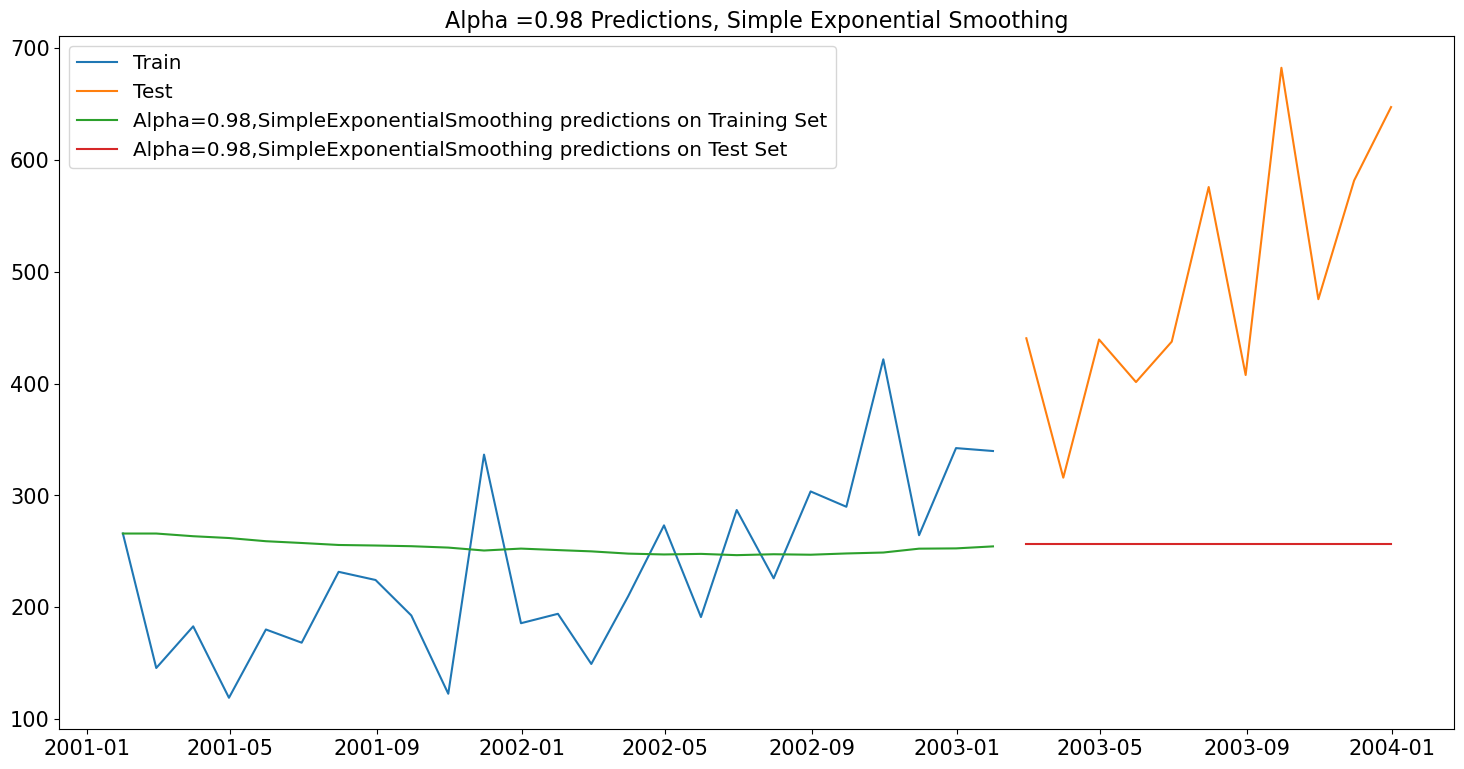

In [237]:
## Plotting on both the Training and Test data 
## Alpha=0.98,SimpleExponentialSmoothing

SES_train = train.copy()
SES_test = test.copy()

model_SES = SimpleExpSmoothing(SES_train['Sales'])

model_SES_fit = model_SES.fit(smoothing_level=0.02,optimized=False,use_brute=True)

SES_train['predict'] = model_SES_fit.fittedvalues
SES_test['predict'] = model_SES_fit.forecast(len(SES_test))


plt.figure(figsize=(18,9))
plt.plot(SES_train['Sales'], label='Train')
plt.plot(SES_test['Sales'], label='Test')

plt.plot(SES_train['predict'], label='Alpha=0.98,SimpleExponentialSmoothing predictions on Training Set')
plt.plot(SES_test['predict'], label='Alpha=0.98,SimpleExponentialSmoothing predictions on Test Set')
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.legend(loc = 'best')
plt.legend(fontsize="x-large")
plt.grid()
plt.title('Alpha =0.98 Predictions, Simple Exponential Smoothing')


plt.grid();

In [238]:
resultsDf_5_3 = pd.DataFrame({'Model': ['Alpha=0.98,SimpleExponentialSmoothing'],
                                'Test RMSE': [resultsDf_5_2['Test RMSE'][1]]
                            ,'Test MAPE': [resultsDf_5_2['Test MAPE'][1]]}
                           ,index=['Model 5.1'])

resultsDf = pd.concat([resultsDf, resultsDf_5_3])
resultsDf

,Model,Test RMSE,Test MAPE
Model 1,RegressionOnTime,164.563291,27.94
Model 2,SimpleAverage,279.195549,52.35
Model 3.1,2pointTrailingMovingAverage,71.420194,12.78
Model 3.2,4pointTrailingMovingAverage,75.513759,13.05
Model 3.3,6pointTrailingMovingAverage,88.575544,14.62
Model 3.4,9pointTrailingMovingAverage,113.259927,18.07
Model 4.1,"Alpha=0.295531,SimpleExponentialSmoothing",198.478952,34.15
Model 5.1,"Alpha=0.98,SimpleExponentialSmoothing",258.898294,47.83


In [239]:
## Model 6: Double Exponential Smoothing (Holt's Model)

In [240]:
DES_train = train.copy()
DES_test = test.copy()
model_DES = Holt(DES_train['Sales'])

C:\Users\dilan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


In [241]:
model_DES_autofit = model_DES.fit(optimized=True,use_brute=True)

In [242]:
model_DES_autofit.params_formatted

,name,param,optimized
smoothing_level,alpha,0.530519,True
smoothing_trend,beta,0.530518,True
initial_level,l.0,266.000000,False
initial_trend,b.0,-120.100000,False


In [243]:
test_predictions_model6 = model_DES_autofit.forecast(steps=len(test))
test_predictions_model6.head()

2003-02-28    345.592077
2003-03-31    348.428986
2003-04-30    351.265895
2003-05-31    354.102804
2003-06-30    356.939713
Freq: ME, dtype: float64

In [244]:
## Test Data - RMSE and MAPE

rmse_model6_test = metrics.mean_squared_error(DES_test['Sales'],test_predictions_model6,squared=False)
mape_model6_test = MAPE(DES_test['Sales'],test_predictions_model6)
print("For Alpha=0.0.526316,Beta=0.526316,DoubleExponentialSmoothing predictions on Test Set,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model6_test, mape_model6_test))

For Alpha=0.0.526316,Beta=0.526316,DoubleExponentialSmoothing predictions on Test Set,  RMSE is 166.620 MAPE is 27.96


C:\Users\dilan\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [245]:
resultsDf6_1 = pd.DataFrame({'Model': "Alpha=0.526316,Beta=0.526316:DoubleExponentialSmoothing",'Test RMSE': [rmse_model6_test],'Test MAPE': [mape_model6_test]}
                              ,index=['Model 6.1'])

resultsDf = pd.concat([resultsDf, resultsDf6_1])
resultsDf

,Model,Test RMSE,Test MAPE
Model 1,RegressionOnTime,164.563291,27.94
Model 2,SimpleAverage,279.195549,52.35
Model 3.1,2pointTrailingMovingAverage,71.420194,12.78
Model 3.2,4pointTrailingMovingAverage,75.513759,13.05
Model 3.3,6pointTrailingMovingAverage,88.575544,14.62
Model 3.4,9pointTrailingMovingAverage,113.259927,18.07
Model 4.1,"Alpha=0.295531,SimpleExponentialSmoothing",198.478952,34.15
Model 5.1,"Alpha=0.98,SimpleExponentialSmoothing",258.898294,47.83
Model 6.1,"Alpha=0.526316,Beta=0.526316:DoubleExponentialSmoothing",166.619669,27.96


In [246]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_6_2

,Alpha Values,Beta Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE


In [247]:
#En düşük test RMSE'sini kontrol etmek için Alfa ve Beta değerlerini değiştirme

C:\Users\dilan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\dilan\AppData\Local\Temp\ipykernel_5816\975357622.py:9: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model_DES_fit = model_DES.fit(smoothing_level=0.18,smoothing_slope=0.68,optimized=False,use_brute=True)


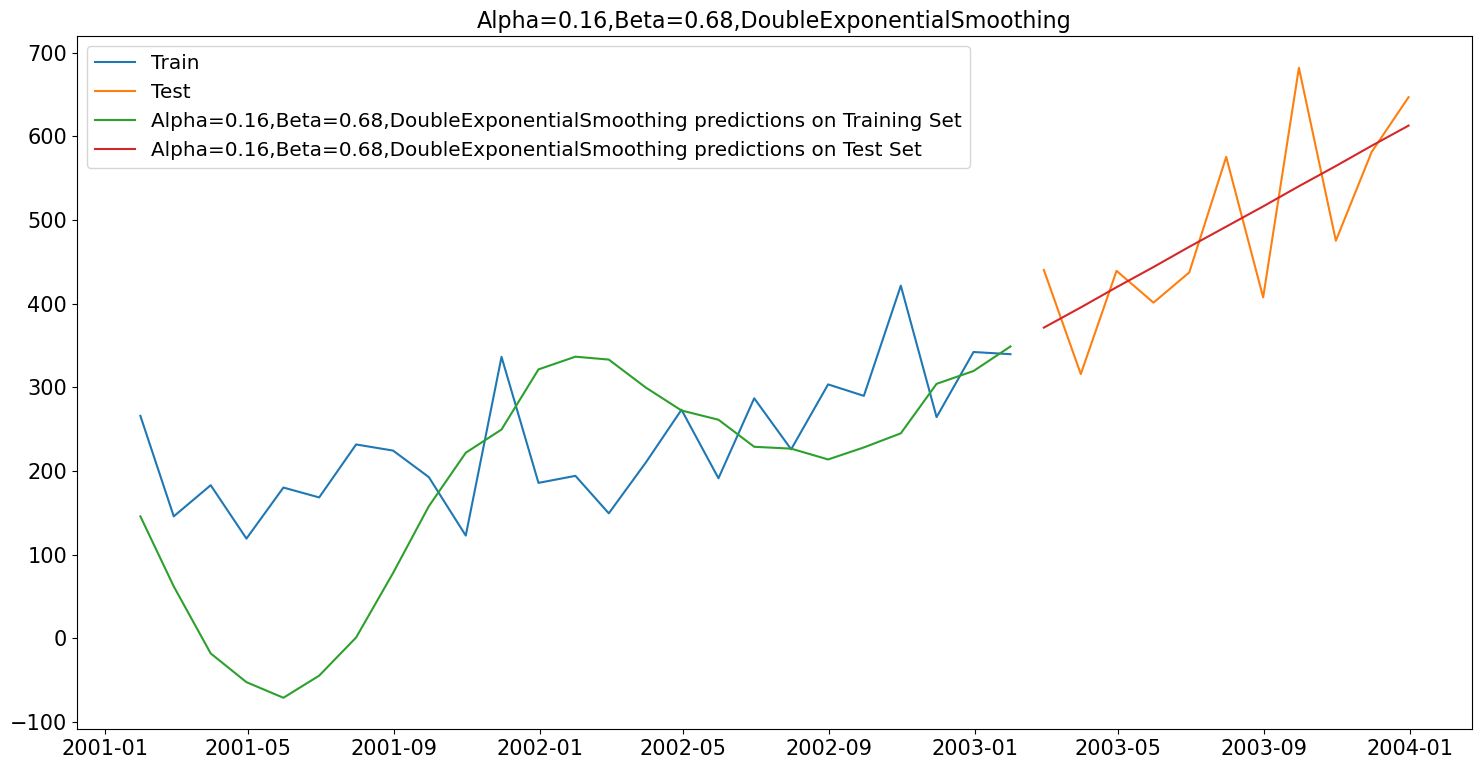

In [248]:
## Plotting on both the Training and Test data 
## Alpha=0.18,Beta=0.68,DoubleExponentialSmoothing

DES_train = train.copy()
DES_test = test.copy()

model_DES = Holt(DES_train['Sales'])

model_DES_fit = model_DES.fit(smoothing_level=0.18,smoothing_slope=0.68,optimized=False,use_brute=True)

DES_train['predict'] = model_DES_fit.fittedvalues
DES_test['predict'] = model_DES_fit.forecast(steps=55)


plt.figure(figsize=(18,9))
plt.plot(DES_train['Sales'], label='Train')
plt.plot(DES_test['Sales'], label='Test')

plt.plot(DES_train['predict'], label='Alpha=0.16,Beta=0.68,DoubleExponentialSmoothing predictions on Training Set')
plt.plot(DES_test['predict'], label='Alpha=0.16,Beta=0.68,DoubleExponentialSmoothing predictions on Test Set')
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.legend(loc = 'best')
plt.legend(fontsize="x-large")
plt.grid()
plt.title('Alpha=0.16,Beta=0.68,DoubleExponentialSmoothing')


plt.grid();

In [249]:
resultsDf_6_3 = pd.DataFrame({'Model': 'Alpha=0.16,Beta=0.68,DoubleExponentialSmoothing','Test RMSE': 75.210387	,'Test MAPE':13.06}
                       ,index=['Model 6.2'])




resultsDf = pd.concat([resultsDf, resultsDf_6_3])
resultsDf

,Model,Test RMSE,Test MAPE
Model 1,RegressionOnTime,164.563291,27.94
Model 2,SimpleAverage,279.195549,52.35
Model 3.1,2pointTrailingMovingAverage,71.420194,12.78
Model 3.2,4pointTrailingMovingAverage,75.513759,13.05
Model 3.3,6pointTrailingMovingAverage,88.575544,14.62
Model 3.4,9pointTrailingMovingAverage,113.259927,18.07
Model 4.1,"Alpha=0.295531,SimpleExponentialSmoothing",198.478952,34.15
Model 5.1,"Alpha=0.98,SimpleExponentialSmoothing",258.898294,47.83
Model 6.1,"Alpha=0.526316,Beta=0.526316:DoubleExponentialSmoothing",166.619669,27.96
Model 6.2,"Alpha=0.16,Beta=0.68,DoubleExponentialSmoothing",75.210387,13.06


Model 7: Triple Exponential Smoothing (Holt - Winter's Model)

In [251]:
TES_train = train.copy()
TES_test = test.copy()

In [252]:
model_TES = ExponentialSmoothing(TES_train['Sales'],trend='additive',seasonal='multiplicative',freq='ME')
model_TES_autofit = model_TES.fit()

In [253]:
model_TES_autofit.params

{'smoothing_level': 0.03725312065569617,
 'smoothing_trend': 0.022190150274008703,
 'smoothing_seasonal': 0.19840272730790287,
 'damping_trend': nan,
 'initial_level': 113.13240276818196,
 'initial_trend': 3.304567277946337,
 'initial_seasons': array([1.66250067, 1.05129799, 1.37826382, 1.39145158, 1.23481451,
        1.52405087, 1.48131329, 1.67376946, 1.50499154, 1.7516221 ,
        1.71271479, 1.57229735]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [254]:
## Prediction on the training data

TES_train['auto_predict'] = model_TES_autofit.fittedvalues
TES_train.head()

,Sales,auto_predict
Time_Stamp,,
2001-01-31,266.0,193.576541
2001-02-28,145.9,127.628002
2001-03-31,183.1,172.838178
2001-04-30,119.3,179.554713
2001-05-31,180.3,161.456206


In [255]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=11)
TES_test.head()

,Sales,auto_predict
Time_Stamp,,
2003-02-28,440.4,210.830717
2003-03-31,315.9,280.047541
2003-04-30,439.3,283.860039
2003-05-31,401.3,259.906534
2003-06-30,437.4,322.349080


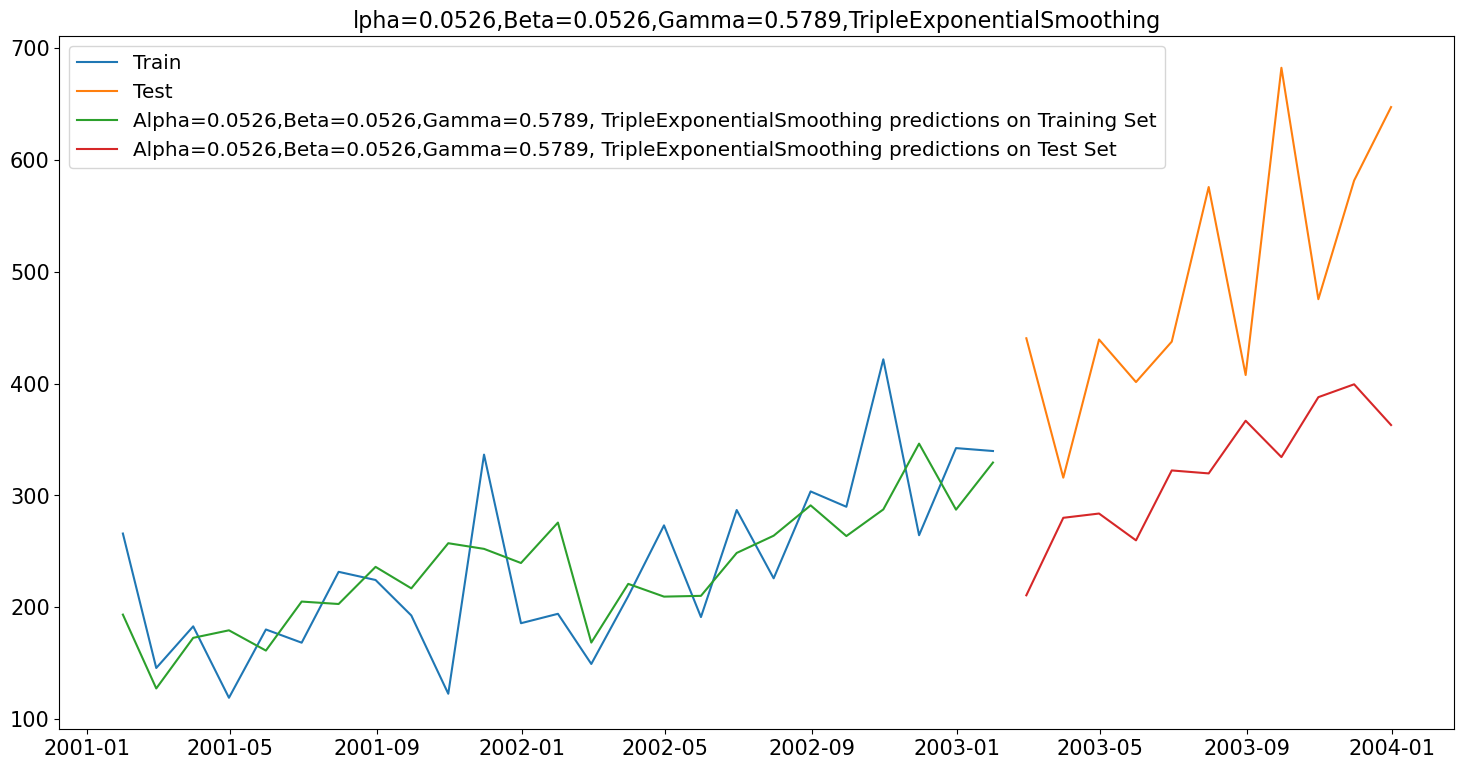

In [256]:
## Plotting on both the Training and Test using autofit
## lpha=0.0526,Beta=0.0526,Gamma=0.5789,TripleExponentialSmoothing

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sales'], label='Train')
plt.plot(TES_test['Sales'], label='Test')


plt.plot(TES_train['auto_predict'], label='Alpha=0.0526,Beta=0.0526,Gamma=0.5789, TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test['auto_predict'], label='Alpha=0.0526,Beta=0.0526,Gamma=0.5789, TripleExponentialSmoothing predictions on Test Set')
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.legend(loc = 'best')
plt.legend(fontsize="x-large")
plt.grid()
plt.title('lpha=0.0526,Beta=0.0526,Gamma=0.5789,TripleExponentialSmoothing')


plt.grid();

In [257]:
## Training Data

rmse_model7_train_1 = metrics.root_mean_squared_error(TES_train['Sales'],TES_train['auto_predict'])
mape_model7_train_1 = MAPE(TES_train['Sales'],TES_train['auto_predict'])
print("For alpha=0.0526,Beta=0.0526,Gamma=0.5789, Triple Exponential Smoothing Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model7_train_1, mape_model7_train_1))

For alpha=0.0526,Beta=0.0526,Gamma=0.5789, Triple Exponential Smoothing Model forecast on the Training Data,  RMSE is 57.867 MAPE is 19.56


In [258]:
## Test Data

rmse_model7_test_1 = metrics.root_mean_squared_error(TES_test['Sales'],TES_test['auto_predict'])
mape_model7_test_1 = MAPE(TES_test['Sales'],TES_test['auto_predict'])
print("For alpha=0.0526,Beta=0.0526,Gamma=0.5789, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model7_test_1, mape_model7_test_1))

For alpha=0.0526,Beta=0.0526,Gamma=0.5789, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 195.595 MAPE is 34.71


In [259]:
resultsDf_7_1 = pd.DataFrame({'Model': ' lpha=0.0526,Beta=0.0526,Gamma=0.5789,TripleExponentialSmoothing','Test RMSE': [rmse_model7_test_1],'Test MAPE':[mape_model7_test_1]}
                           ,index=['Model 7.1'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

,Model,Test RMSE,Test MAPE
Model 1,RegressionOnTime,164.563291,27.94
Model 2,SimpleAverage,279.195549,52.35
Model 3.1,2pointTrailingMovingAverage,71.420194,12.78
Model 3.2,4pointTrailingMovingAverage,75.513759,13.05
Model 3.3,6pointTrailingMovingAverage,88.575544,14.62
Model 3.4,9pointTrailingMovingAverage,113.259927,18.07
Model 4.1,"Alpha=0.295531,SimpleExponentialSmoothing",198.478952,34.15
Model 5.1,"Alpha=0.98,SimpleExponentialSmoothing",258.898294,47.83
Model 6.1,"Alpha=0.526316,Beta=0.526316:DoubleExponentialSmoothing",166.619669,27.96
Model 6.2,"Alpha=0.16,Beta=0.68,DoubleExponentialSmoothing",75.210387,13.06


In [260]:
pd.options.display.max_colwidth = 100
resultsDf.sort_values(by = 'Test RMSE')

,Model,Test RMSE,Test MAPE
Model 3.1,2pointTrailingMovingAverage,71.420194,12.78
Model 6.2,"Alpha=0.16,Beta=0.68,DoubleExponentialSmoothing",75.210387,13.06
Model 3.2,4pointTrailingMovingAverage,75.513759,13.05
Model 3.3,6pointTrailingMovingAverage,88.575544,14.62
Model 3.4,9pointTrailingMovingAverage,113.259927,18.07
Model 1,RegressionOnTime,164.563291,27.94
Model 6.1,"Alpha=0.526316,Beta=0.526316:DoubleExponentialSmoothing",166.619669,27.96
Model 7.1,"lpha=0.0526,Beta=0.0526,Gamma=0.5789,TripleExponentialSmoothing",195.595410,34.71
Model 4.1,"Alpha=0.295531,SimpleExponentialSmoothing",198.478952,34.15
Model 5.1,"Alpha=0.98,SimpleExponentialSmoothing",258.898294,47.83


In [392]:
print("Smoothing Level (Alfa):", model_DES_fit.params['smoothing_level'])
print("Smoothing Trend (Beta):", model_DES_fit.params['smoothing_trend'])

Smoothing Level (Alfa): 0.18
Smoothing Trend (Beta): 0.68


In [399]:
len(test_predictions_model6)

11

C:\Users\dilan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


Full_Model_DES (Alpha: 0.16,Beta: 0.68): RMSE: 127.59598774673321 
MAPE: 33.52


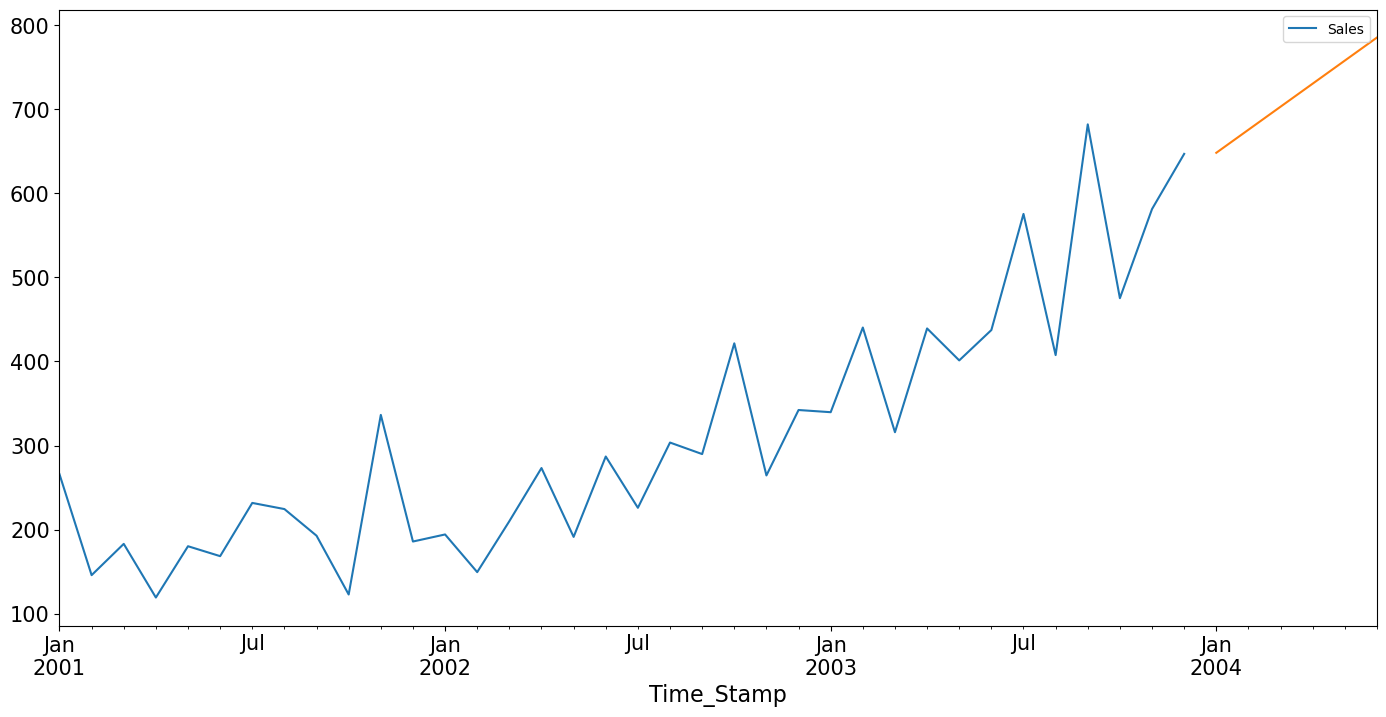

In [401]:
model_DES_full = Holt(df_final['Sales'])
fullmodel1 = model_DES_full.fit(smoothing_level=0.16,smoothing_trend=0.68,optimized=False,use_brute=True)
RMSE_fullmodel1 = metrics.root_mean_squared_error(df_final['Sales'],fullmodel1.fittedvalues)
MAPE_fullmodel1 = MAPE(df_final['Sales'],fullmodel1.fittedvalues)

print('Full_Model_DES (Alpha: 0.16,Beta: 0.68): RMSE:',RMSE_fullmodel1,'\nMAPE:',MAPE_fullmodel1)

# Getting the predictions for the same number of times stamps that are present in the test data
prediction_1 = fullmodel1.forecast(steps=6)
df_final.plot()
prediction_1.plot();

In [262]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#The percentile function under numpy lets us calculate these and adding and subtracting from the predictions
#gives us the necessary confidence bands for the predictions
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - ((np.percentile(prediction_1,[2.5,97.5])))[0],
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + ((np.percentile(prediction_1,[2.5,97.5])))[1]})
pred_1_df.head()

,lower_CI,prediction,upper_ci
2004-01-31,-3.427161,648.205033,1430.069344
2004-02-29,23.990127,675.622321,1457.486632
2004-03-31,51.407415,703.039609,1484.903920
2004-04-30,78.824703,730.456897,1512.321208
2004-05-31,106.241991,757.874185,1539.738496


Text(0.5, 1.0, 'Triple Exponential Smoothing 0.4,0.1,0.2')

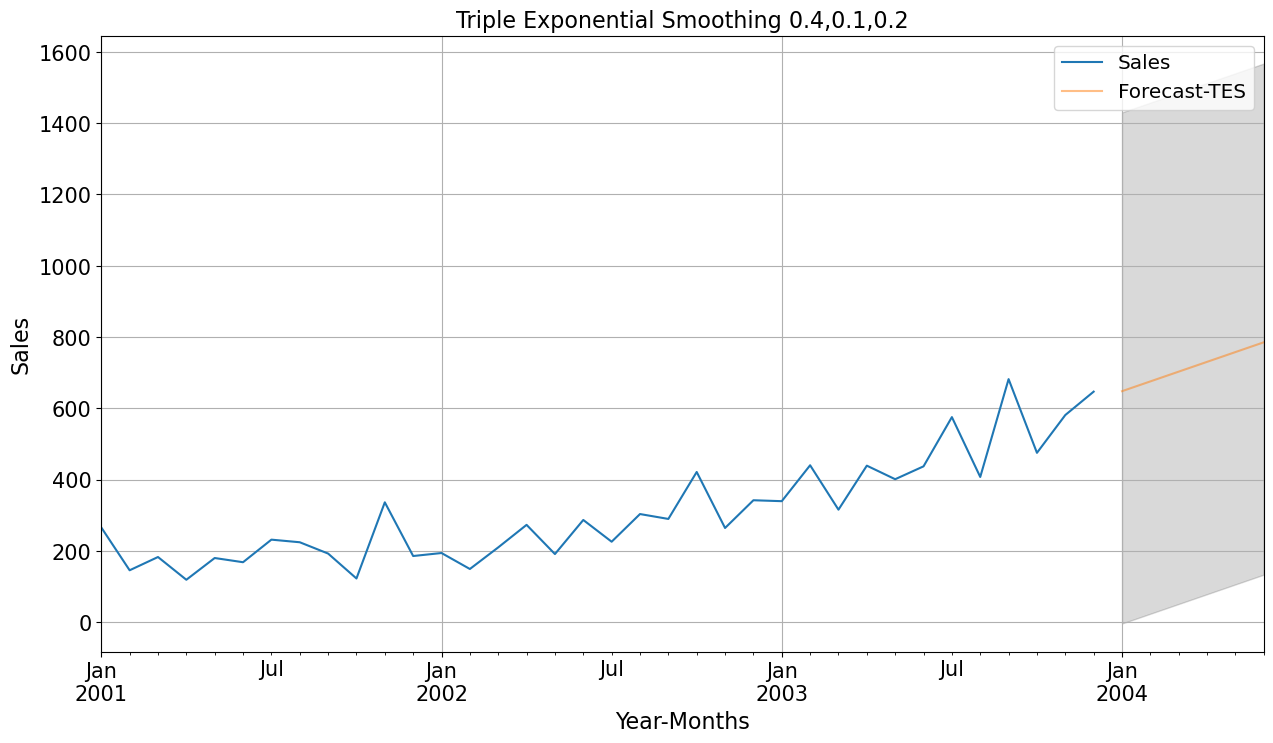

In [263]:
# plot the forecast along with the confidence band

axis = df_final.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast-TES', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.legend(loc = 'best')
plt.legend(fontsize="x-large")
plt.grid()
plt.title('Triple Exponential Smoothing 0.4,0.1,0.2')